In [1]:
%matplotlib inline
from preamble import *

## 4. Representing Data and Engineering Features

- 특성(Feature)의 종류
  - Continuous Feature (연속형 특성)
    - 정량적
    - 예
      - 픽셀 밝기
      - 붓꽃 측정값
  - Categorical Feature (범주형 특성) or Discrete Feature (이산형 특성)
    - 정성적
    - 예
      - 제품의 브랜드
      - 색상
      - 판매분류(책, 옷, 하드웨어)
- Feature Engineering (특성 공학)
  - 특정 어플리케이션에 가장 적합한 데이터의 표현을 찾는 것
  - 일반적으로 데이터가 어떤 형태로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 더 많은 영향을 줌
  - 올바른 데이터 표현은 지도학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 많은 영향을 줌

### 4.1 Categorical Variables

- Adult Data Set
  - https://archive.ics.uci.edu/ml/datasets/adult
  - 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋
  - 특성(Feature)
    - 연속형 특성
      - 근로자 나이(age)
      - 주당 근로시간(hours-per-week)
    - 범주형 특성
      - 고용형태(workclass)
        - 자영업(self-emp-not-inc)
        - 사업체 근로자(private)
        - 공공 근로자(state-gov)
      - 교육수준(education)
        - 학사(Bachelors)
        - 석사(Masters)
        - ...
      - 성별(gender)
      - 직업(occupation)
- 풀려는 문제
  - 분류 문제: 어떤 근로자의 수입이 50,000달러를 초과하는지 그 이하인지를 예측 
  - 타깃 특성: income
    - <=50K
    - \>50K
- 사용하려는 머신러닝 모델
  - 로지스틱 회귀
  - 문제
    - 범주형 특성값을 로지스틱 회귀식에 곧바로 넣을 수가 없음

#### 4.1.1 One-Hot-Encoding (Dummy variables)
- One-out-of-N encoding
- Dummy variable

- pandas를 이용하여 데이터를 로드하고 범주형 변수를 원-핫 인코딩으로 변경

In [2]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")

data = pd.read_csv(
    adult_path, 
    header=None, 
    index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

# For illustration purposes, we only select some of the columns:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

##### Checking string-encoded categorical data

- Colume의 내용 확인
  - value_counts()
    - 각 유일한 값들이 몇 번 출현하는지 출력 

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("Original features:", list(data.columns))
print("length of features:", len(data.columns))

Original features: ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
length of features: 7


- pandas.get_dummies(data)
  - 주어진 data에서 범주형(문자열)으로 분류되는 열을 자동으로 수치형으로 변환

In [5]:
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
print("length of dummy features:", len(data_dummies.columns))

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupatio

In [6]:
display(data_dummies.head(n=10))

age  hours-per-week  workclass_ ?  workclass_ Federal-gov      ...       \
0   39              40             0                       0      ...        
1   50              13             0                       0      ...        
2   38              40             0                       0      ...        
3   53              40             0                       0      ...        
4   28              40             0                       0      ...        
5   37              40             0                       0      ...        
6   49              16             0                       0      ...        
7   52              45             0                       0      ...        
8   31              50             0                       0      ...        
9   42              40             0                       0      ...        

   occupation_ Tech-support  occupation_ Transport-moving  income_ <=50K  \
0                         0                             0              1   
1                         0                             0              1   
2                         0                             0              1   
3                         0                             0              1   
4                         0                             0              1   
5                         0                             0              1   
6                         0                             0              1   
7                         0                             0              0   
8                         0                             0              0   
9                         0                             0              0   

   income_ >50K  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             1  
8             1  
9             1  

[10 rows x 46 columns]

In [7]:
one_hot_encoded = data_dummies.loc[:, 'workclass_ ?':'workclass_ Without-pay']
display(one_hot_encoded.head(n=10))
print(one_hot_encoded.values[:10])

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   
5             0                       0                     0   
6             0                       0                     0   
7             0                       0                     0   
8             0                       0                     0   
9             0                       0                     0   

   workclass_ Never-worked           ...            workclass_ Self-emp-inc  \
0                        0           ...                                  0   
1                        0           ...                                  0   
2                        0           ...                                  0   
3                        0           ...                                  0   
4                        0           ...                                  0   
5                        0           ...                                  0   
6                        0           ...                                  0   
7                        0           ...                                  0   
8                        0           ...                                  0   
9                        0           ...                                  0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  
0                            0                     1                       0  
1                            1                     0                       0  
2                            0                     0                       0  
3                            0                     0                       0  
4                            0                     0                       0  
5                            0                     0                       0  
6                            0                     0                       0  
7                            1                     0                       0  
8                            0                     0                       0  
9                            0                     0                       0  

[10 rows x 9 columns]

[[0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]


- 훈련 데이터에서 타깃 속성 제외하기

In [8]:
# Get only the columns containing features
# that is all columns from 'age' to 'occupation_ Transport-moving'
# This range contains all the features but not the target

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


- 로지스틱 회귀 모델 적용 및 평가

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


#### 4.1.2 Numbers can encode categoricals

In [10]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

Categorical Feature  Integer Feature
0               socks                0
1                 fox                1
2               socks                2
3                 box                1

In [11]:
display(pd.get_dummies(demo_df))

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

- astype으로 숫자형 특성을 문자열 특성으로 변환하고 get_dummies() 함수 적용
- 원본 데이터 내에 숫자와 문자열 특성이 모두 원핫인코딩된 결과

In [12]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

### 4.2 Binning, Discretization, Linear Models and Trees
- Binning: 구간 분할
- Discretization: 이산화

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print()
for i in range(10):
    print(X[i], y[i])

X.shape: (100, 1)
y.shape: (100,)

[-0.753] -0.397948579888
[ 2.704] 0.710577548576
[ 1.392] 0.413928667214
[ 0.592] -0.348383793651
[-2.064] -1.6020040642
[-2.064] -1.31357098532
[-2.651] -0.124267998446
[ 2.197] 1.13660584523
[ 0.607] 0.226843650048
[ 1.248] -0.107001128918


(1000, 1)


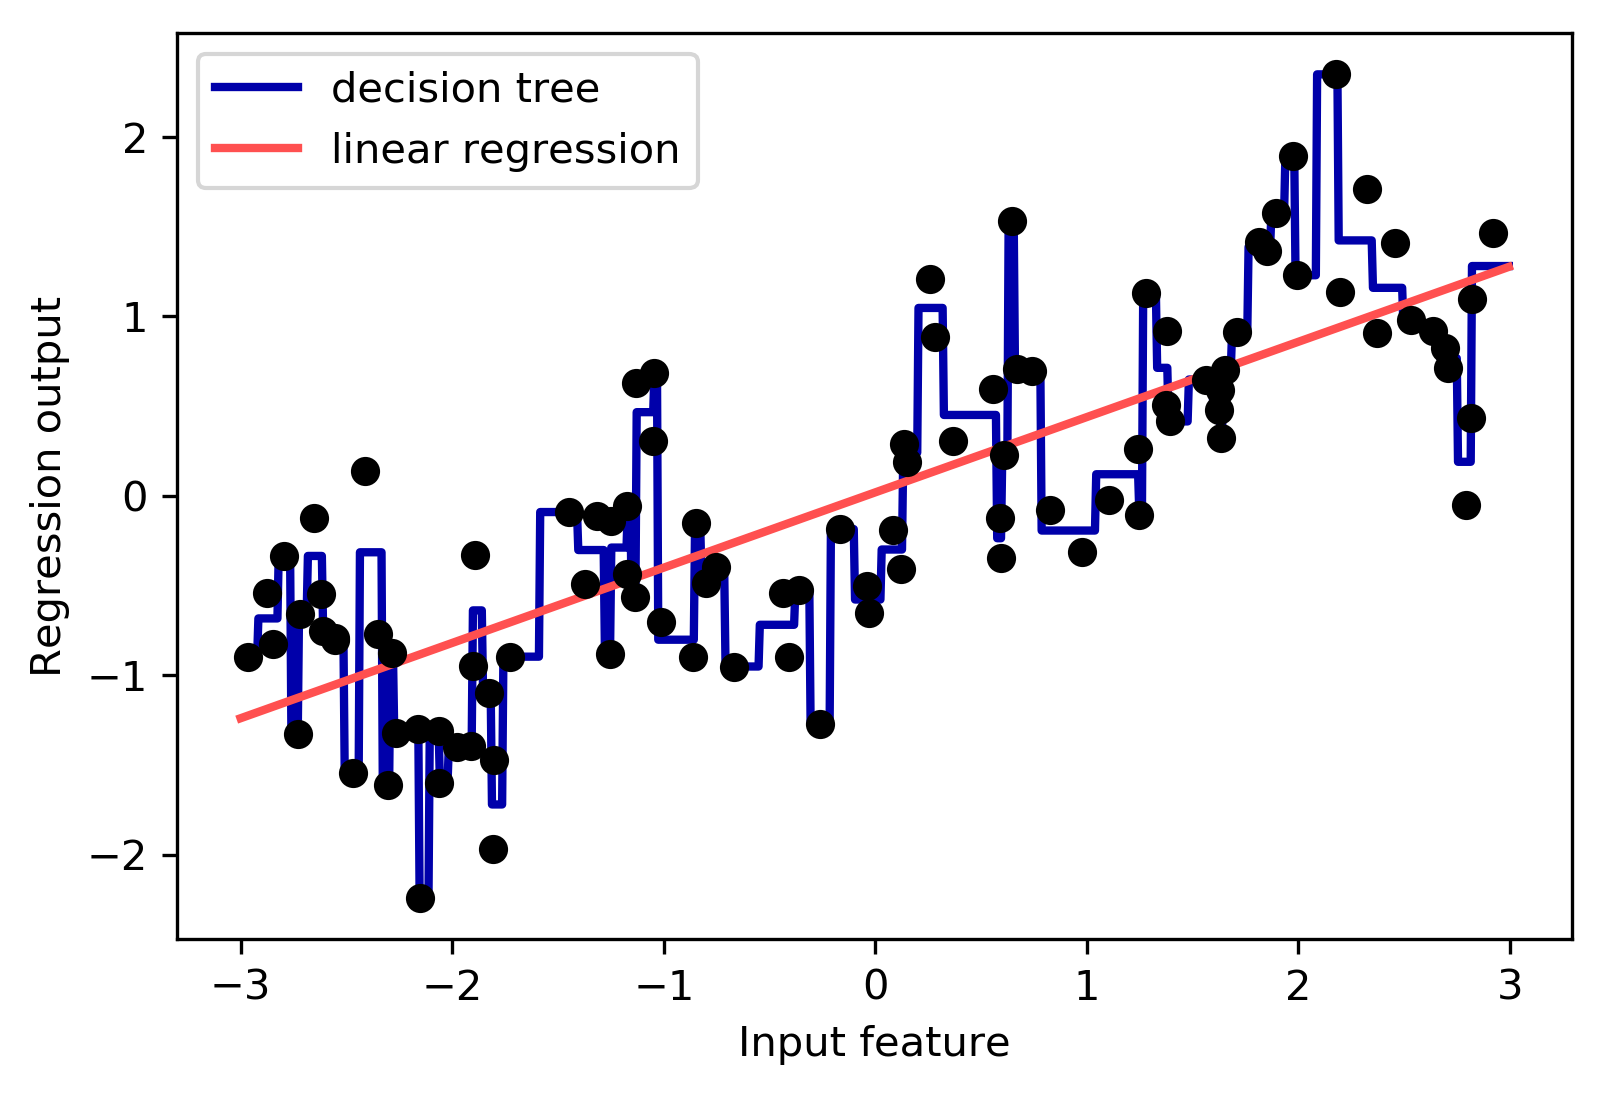

In [14]:
# min_samples_splits
# - The minimum number of samples required to split an internal node
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- 구간 분할 (또는 이산화)
  - 연속형 데이터에 대하여 강력한 선형 모델을 만드는 방법 중 하나

In [15]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- 첫번째 구간: 1 - [-3. -2.4)
- 두번째 구간: 2 - [-2.4 -1.8)
- ...
- 열번째 구간: 10 - [2.4 3.)

- np.digitize(X, bins)
  - X에 있는 데이터를 bins 기준으로 어느 구간에 속하는지를 기록
  - 즉, 연속형 데이터를 이산형 데이터로 변환

In [16]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- OneHotEncoder
  - 이산형 데이터를 One Hot 벡터로 변환

In [17]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [18]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


- One Hot 벡터로 인코딩된 데이터로 결정트리모델과 선형회귀모델을 새로 구성

line.shape: (1000, 1)
line_binned.shape: (1000, 10)


Text(0.5,0,'Input feature')

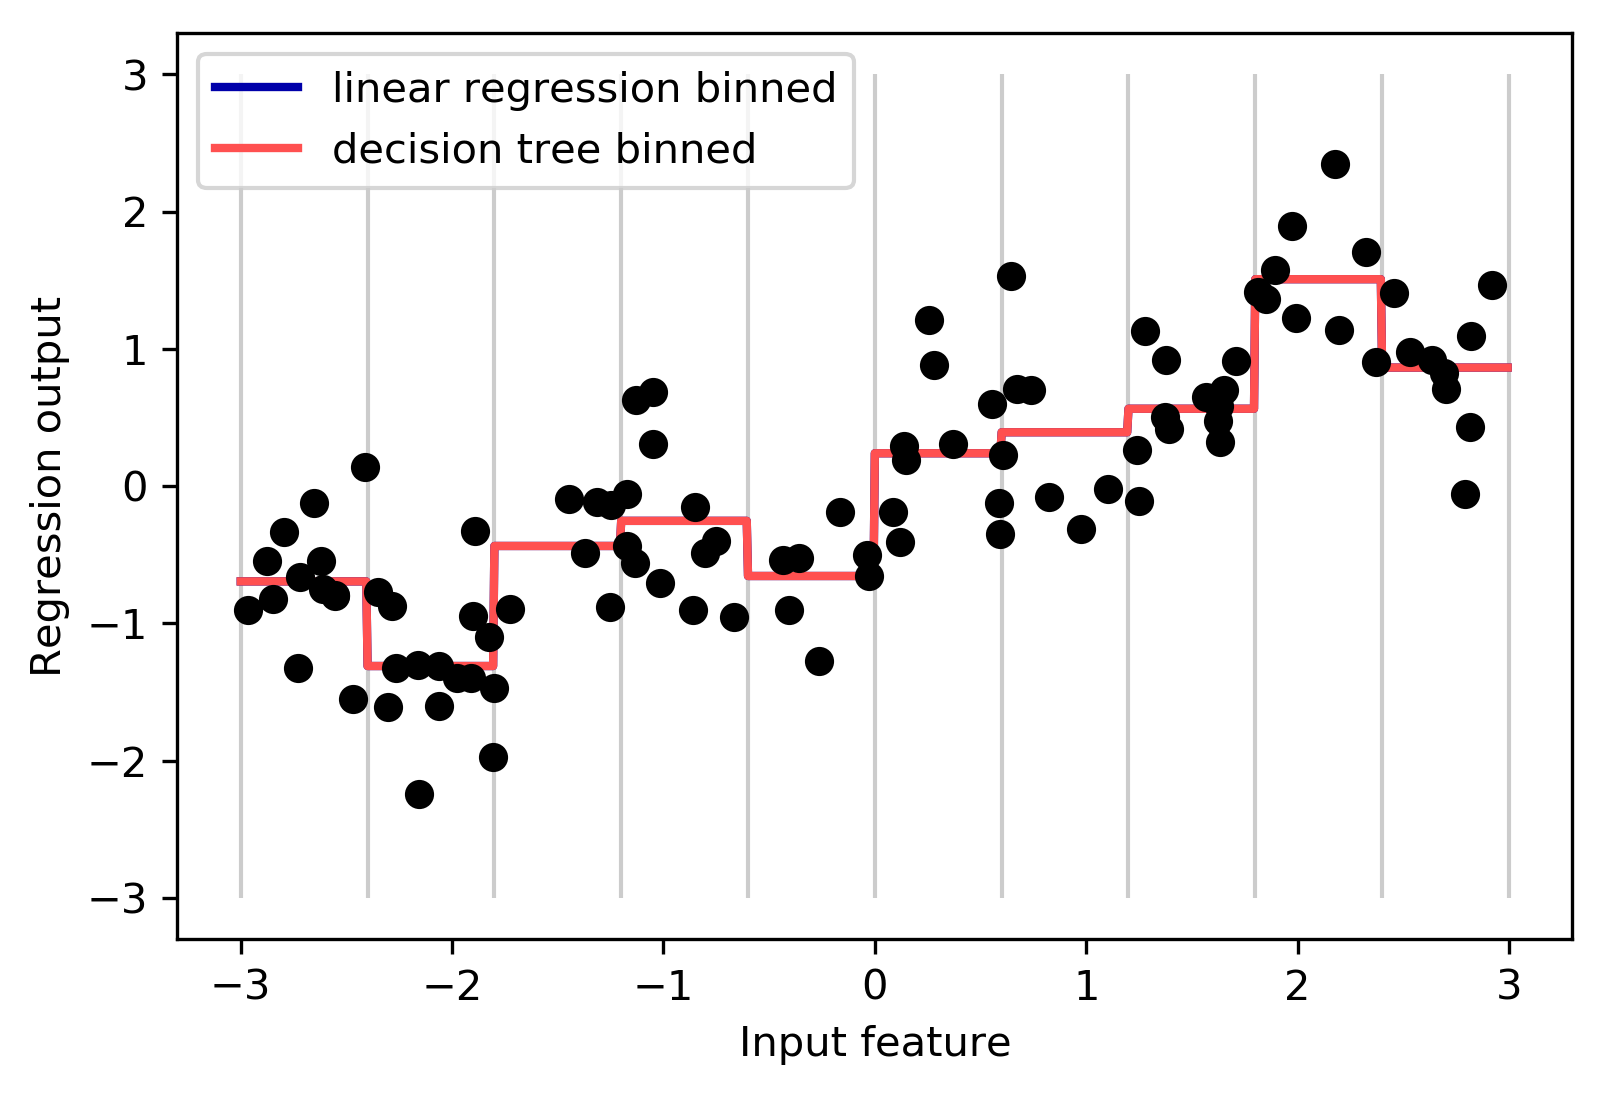

In [19]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print("line.shape:", line.shape)

line_binned = encoder.transform(np.digitize(line, bins=bins))
print("line_binned.shape:", line_binned.shape)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- 선형회귀 모델의 결과와 결정트리 모델 결과가 완전히 일치함
- 각 구간안에서는 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측함
- 데이터의 구간화 (binned or digitized) 변환후 동일한 모델에서 학습하였을 때의 결과
  - Linear Regression: 모델이 더 유연해짐 --> 큰 이득
  - DecisionTreeRegressor: 모델이 덜 유연해짐
- 즉, **선형 모델을 사용해야 할 때 데이터 구간화는 모델 성능을 높혀줌**

### 4.3 Interactions and Polynomials
- 원본 데이터의 특성을 풍부하게 나타내는 방법

In [20]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(100, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.     0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.     1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.     0.   ]
 [ 0.592  0.     0.     0.     0.     0.     1.     0.     0.     0.     0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.   ]]


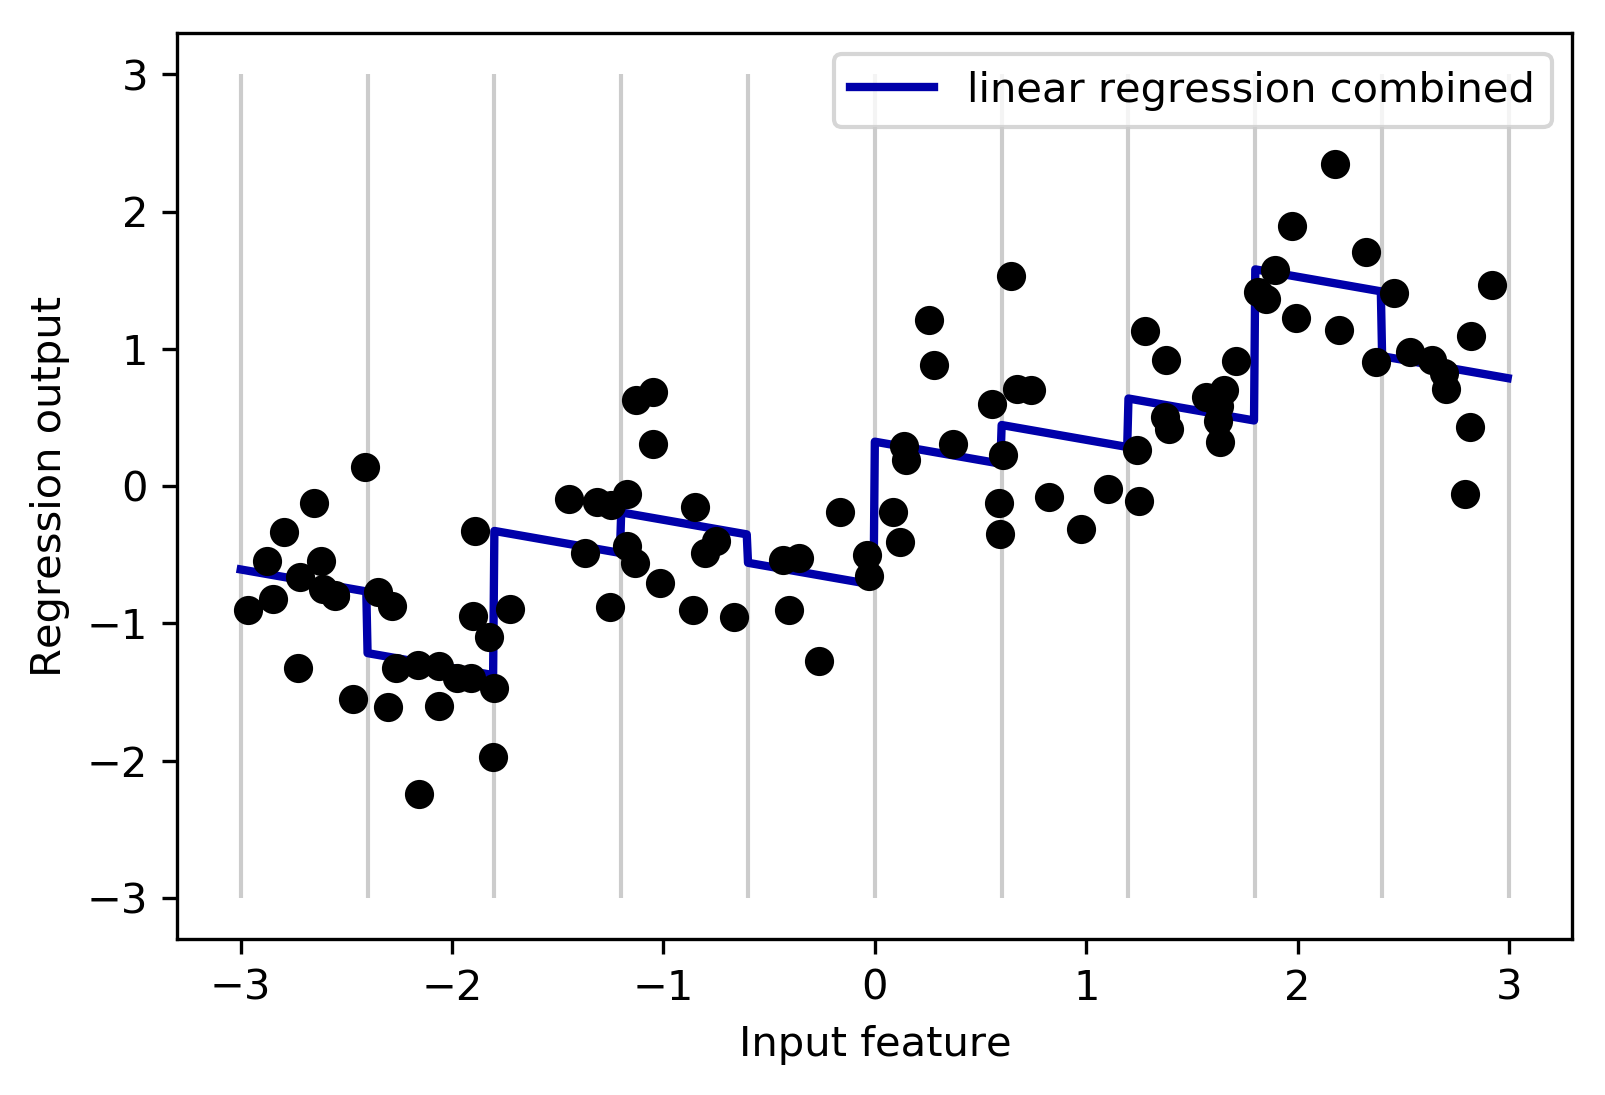

In [21]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [22]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

(100, 20)
[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.    -0.
  -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     2.704]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     1.392  0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.592  0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.    -0.
  -2.064 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]]


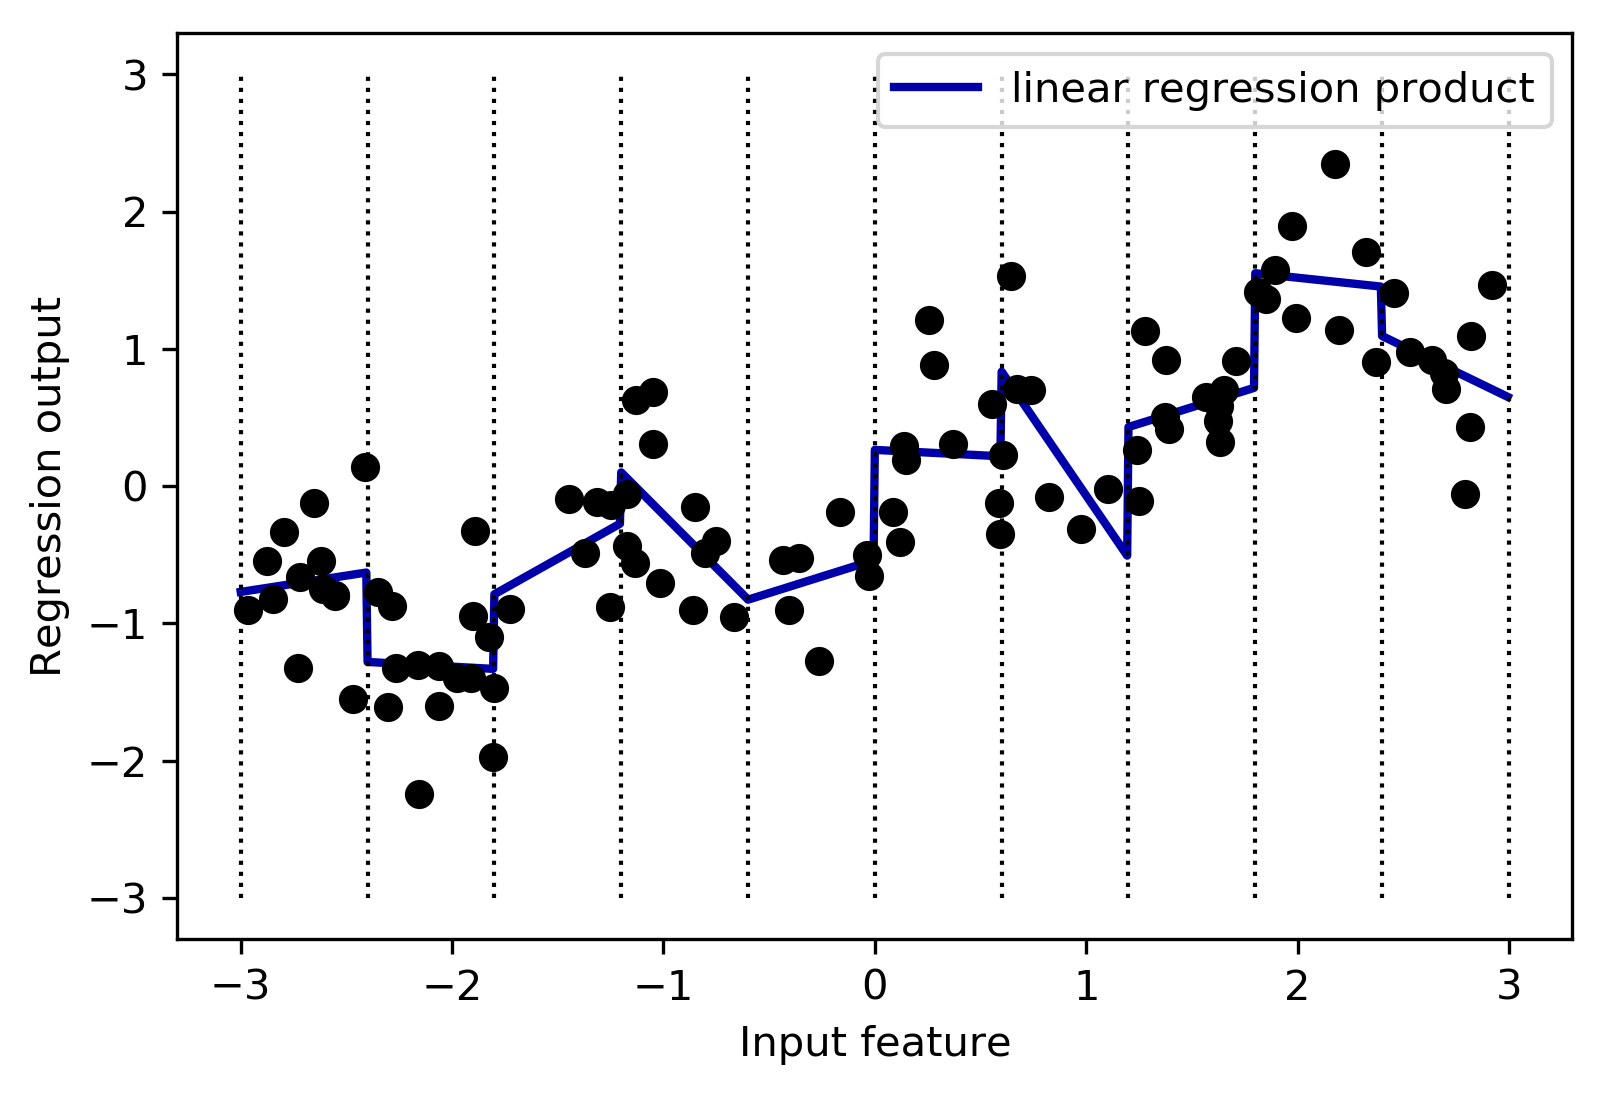

In [23]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- PolynomilalFeatures(degree=10)
  - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
  - 연속형 특성을 확장하는 방법 중 하나
  - 원본 특성의 다항식을 추가
  - [$x$, $x^2$, $x^3$, ..., $x^{10}$]
  - include_bias
    - If True (default), then include a bias column, the feature in which all polynomial powers are zero

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [25]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [26]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[    -0.753      0.567     -0.427      0.321     -0.242      0.182
      -0.137      0.103     -0.078      0.058]
 [     2.704      7.313     19.777     53.482    144.632    391.125
    1057.714   2860.36    7735.232  20918.278]
 [     1.392      1.938      2.697      3.754      5.226      7.274
      10.125     14.094     19.618     27.307]
 [     0.592      0.35       0.207      0.123      0.073      0.043
       0.025      0.015      0.009      0.005]
 [    -2.064      4.26      -8.791     18.144    -37.448     77.289
    -159.516    329.222   -679.478   1402.367]]


In [27]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


- PolynomialFeatures을 사용하여 다항 회귀(Polynomial Regression)모델 생성

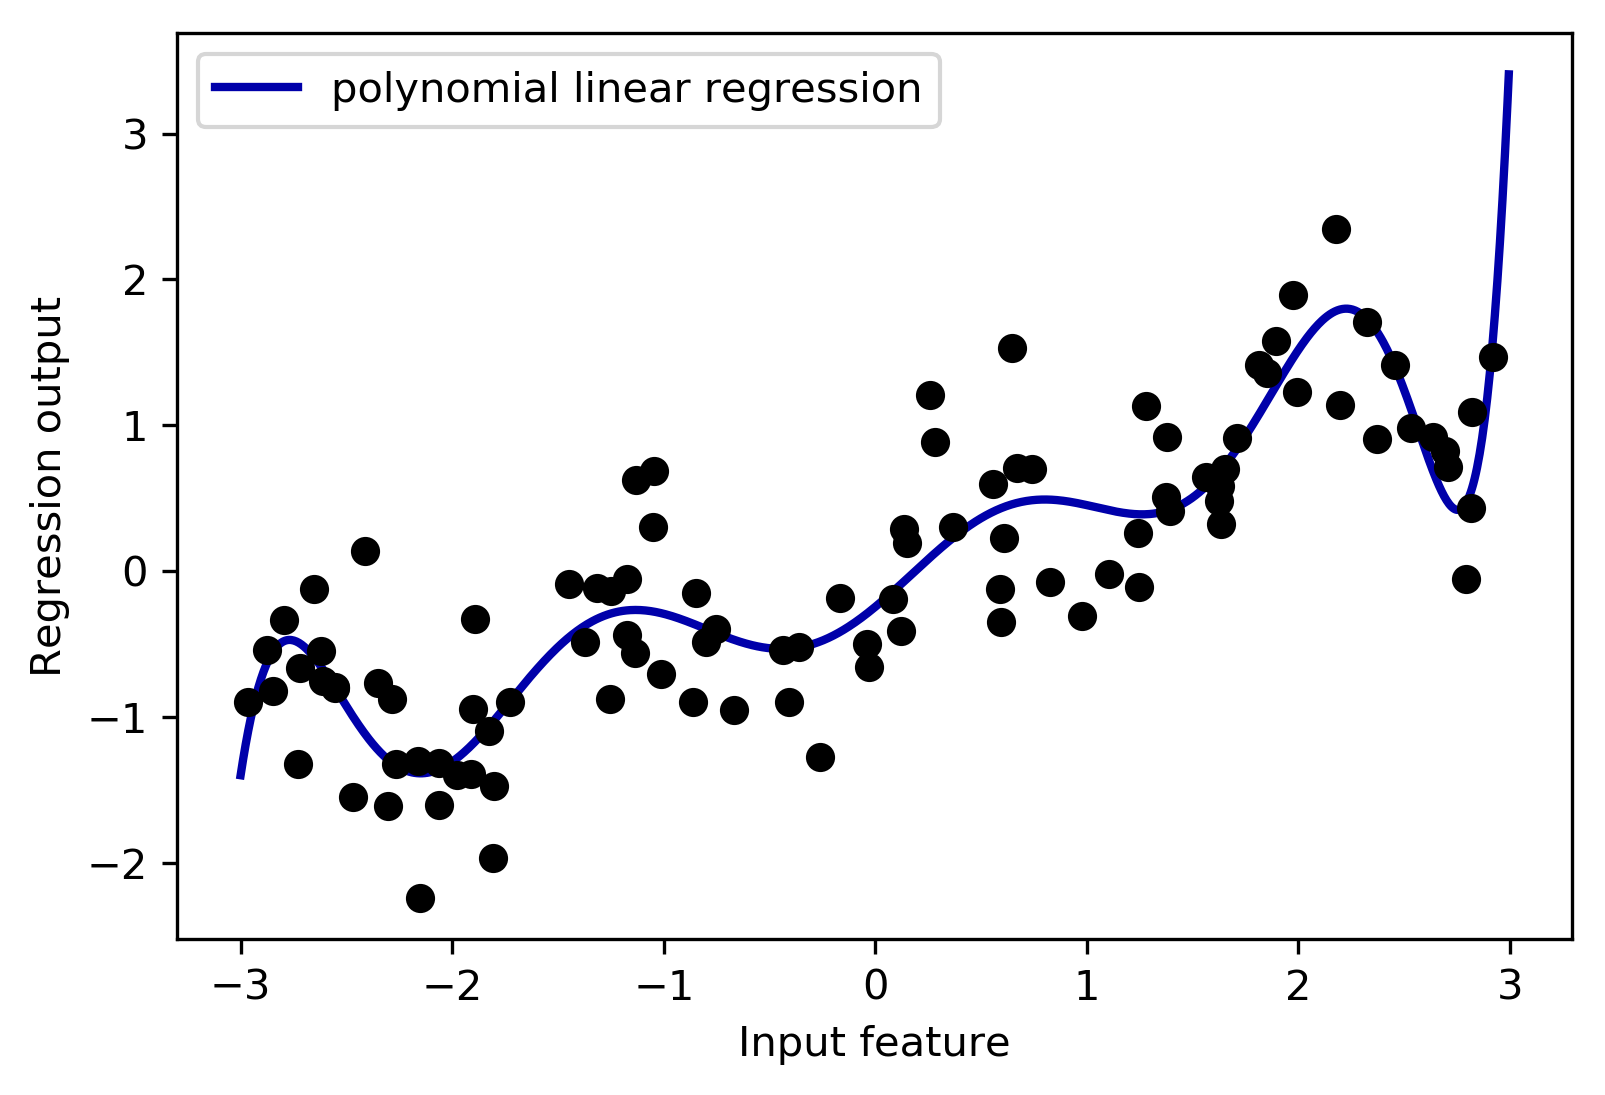

In [28]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

-SVR(gamma='auto')
  - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
  - gamma
    - gamma값이 커짐 --> 모델의 복잡도가 높아짐
    - gamma값이 작아짐 --> 모델의 복잡도가 낮아짐

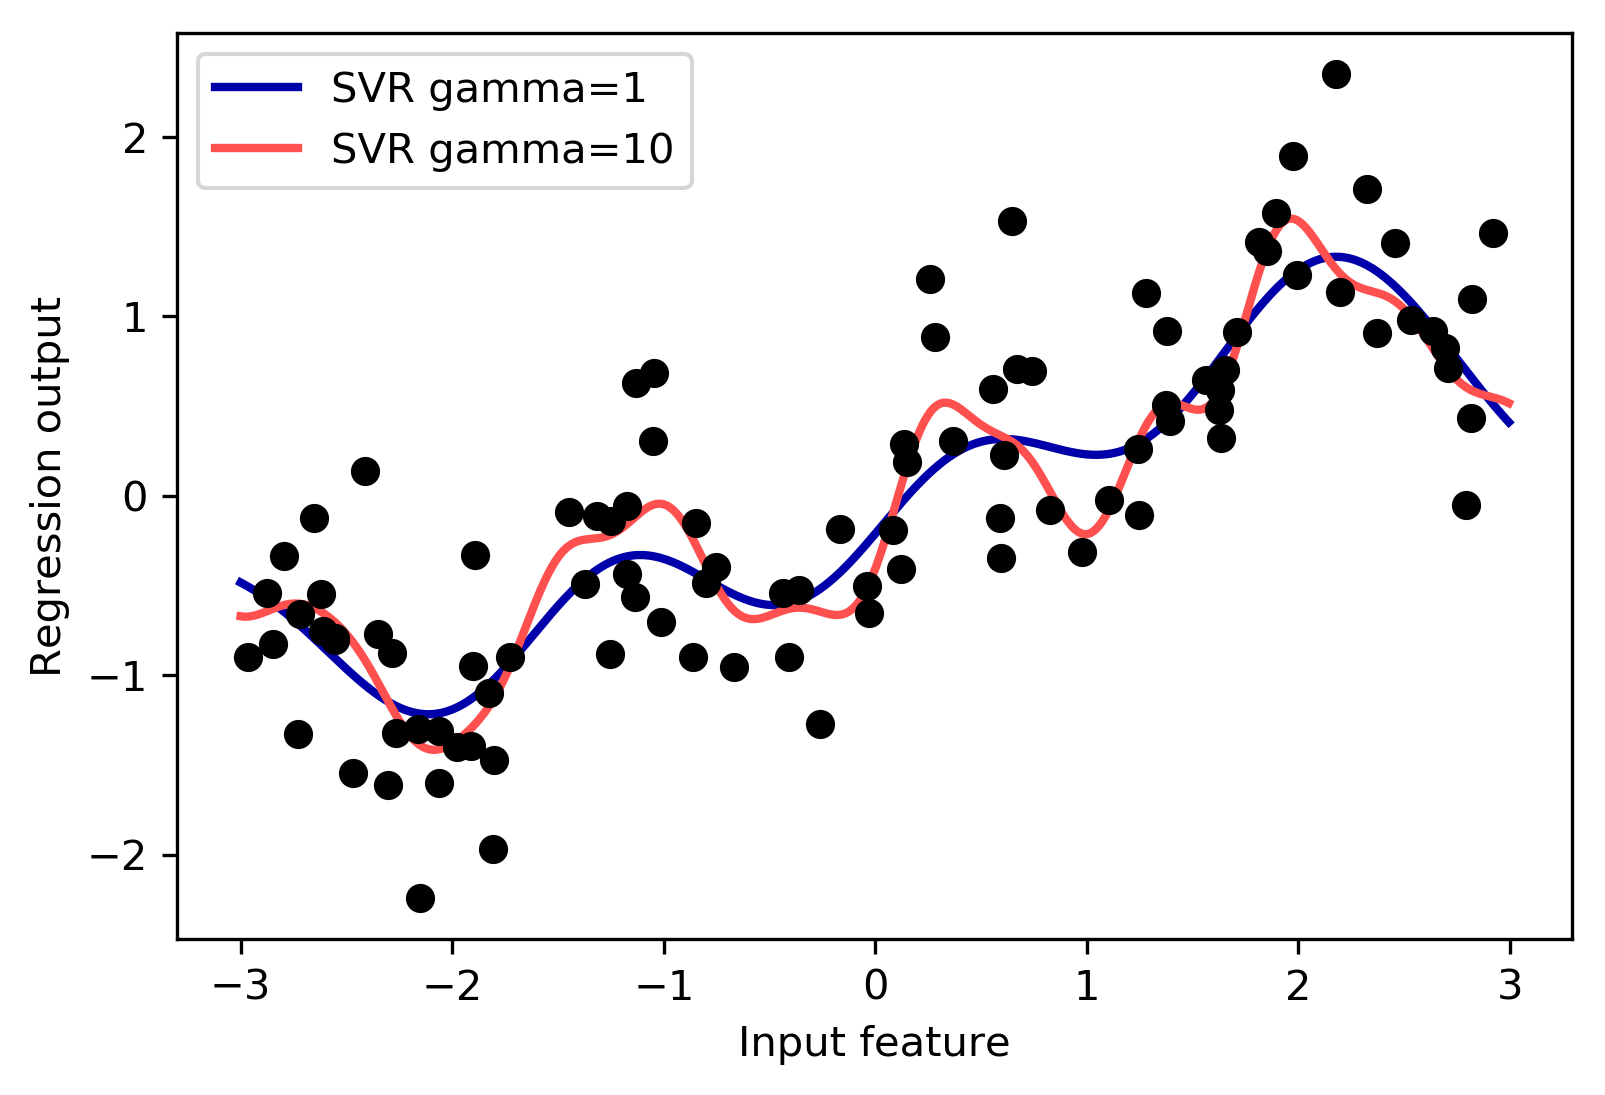

In [29]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- 보스턴 주택 가격 데이터셋

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 원본 데이터의 특성이 13개인데 반해, 다항식 특성을 적용하여 105개의 특성으로 변환됨
  - 1 + 13 + H(13, 2) = 1 + 13 + C(14, 2) = 1 + 13 + 91 = 105

In [32]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


- PolynomialFeatures에 의한 데이터 Augmentation은 선형 모델에 더 적합 

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


- RandomForestRegressor은 데이터 Augmentation에 의하여 성능향상 기대하기 어려움 

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.777
Score with interactions: 0.767


### 4.4 Univariate Non-linear transformations
- log, exp, sin 함수를 사용한 특성 변환
  - 선형 모델 또는 신경망의 성능을 올리는 데 활용
  - 데이터셋에 주기적인 패턴이 있을 때 적합
  - 정수 카운트 데이터에 적합
    - 예. "사용자가 얼마나 자주 로그인하는가?" 같은 특성
    - 카운트에는 음수가 없으며, 임의의 통계 패턴을 따르는 경우가 많음
    - 일반적으로 정규 분포를 따를 때 모델 성능이 좋음

- 인위적으로 카운트 데이터 만들기
  - 1) 표준 정규 분포를 따르는 랜덤 데이터 만들기
  - 2) 해당 랜덤 데이터 \* 10 을 평균으로 지니는 Poisson 분포를 따르는 데이터 만들기

In [35]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
print("X_org.shape:", X_org.shape)
print("w.shape:", w.shape)
print()

X = rnd.poisson(lam = 10 * np.exp(X_org))
y = np.dot(X_org, w)
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print()

print("X_org[:10, 0]:", X_org[:10, 0])
print("X[:10, 0]", X[:10, 0])
print("y[:10]", y[:10])

X_org.shape: (1000, 3)
w.shape: (3,)

X.shape: (1000, 3)
y.shape: (1000,)

X_org[:10, 0]: [ 1.764  2.241  0.95   0.411  0.761  0.334  0.313  0.654  2.27  -0.187]
X[:10, 0] [ 56  81  25  20  27  18  12  21 109   7]
y[:10] [ 2.926  4.744  1.439  0.57   1.231  1.405  0.305  1.618  2.784  0.405]


- bincount로 각 구간별 데이터 개수 세기

In [36]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

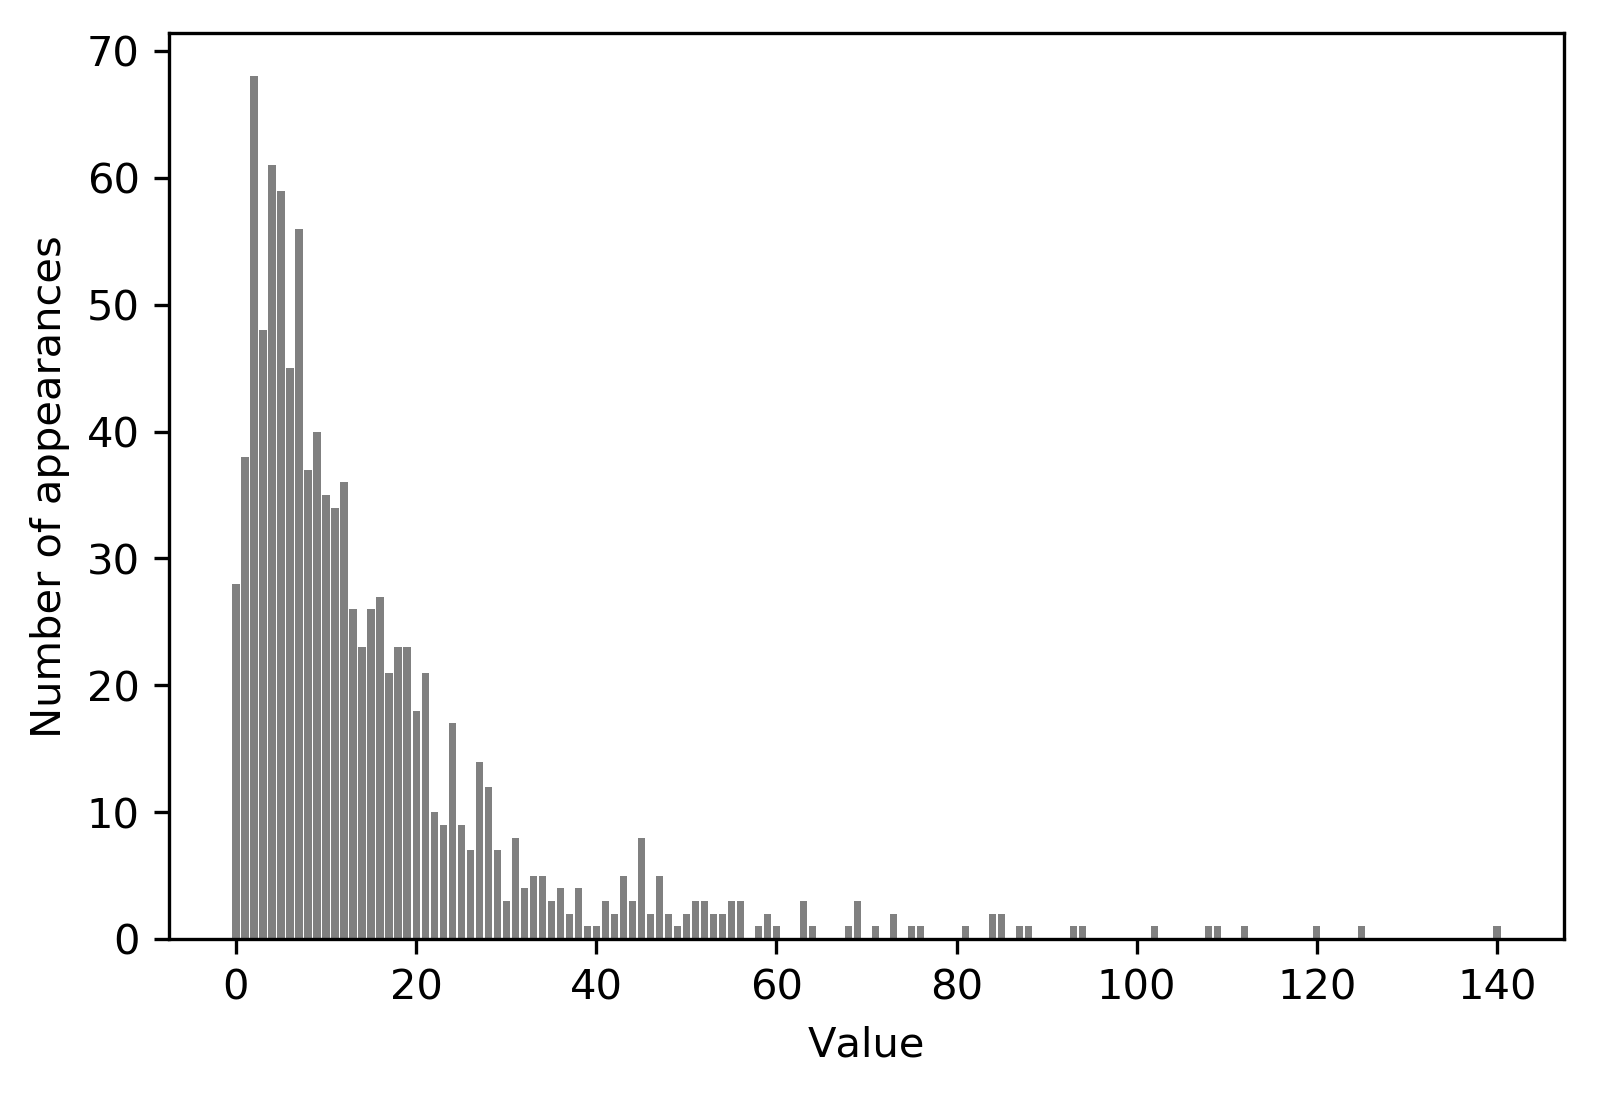

In [37]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

- 위와 같은 데이터에 선형회귀 모델인 Ridge 적용하기 
  - 성능이 좋지 못함.

In [38]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


- 원본 데이터 X를 log(X+1) 식을 사용하여 변환하기

In [39]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

- 데이터가 정규분포에 가깝게 변환됨

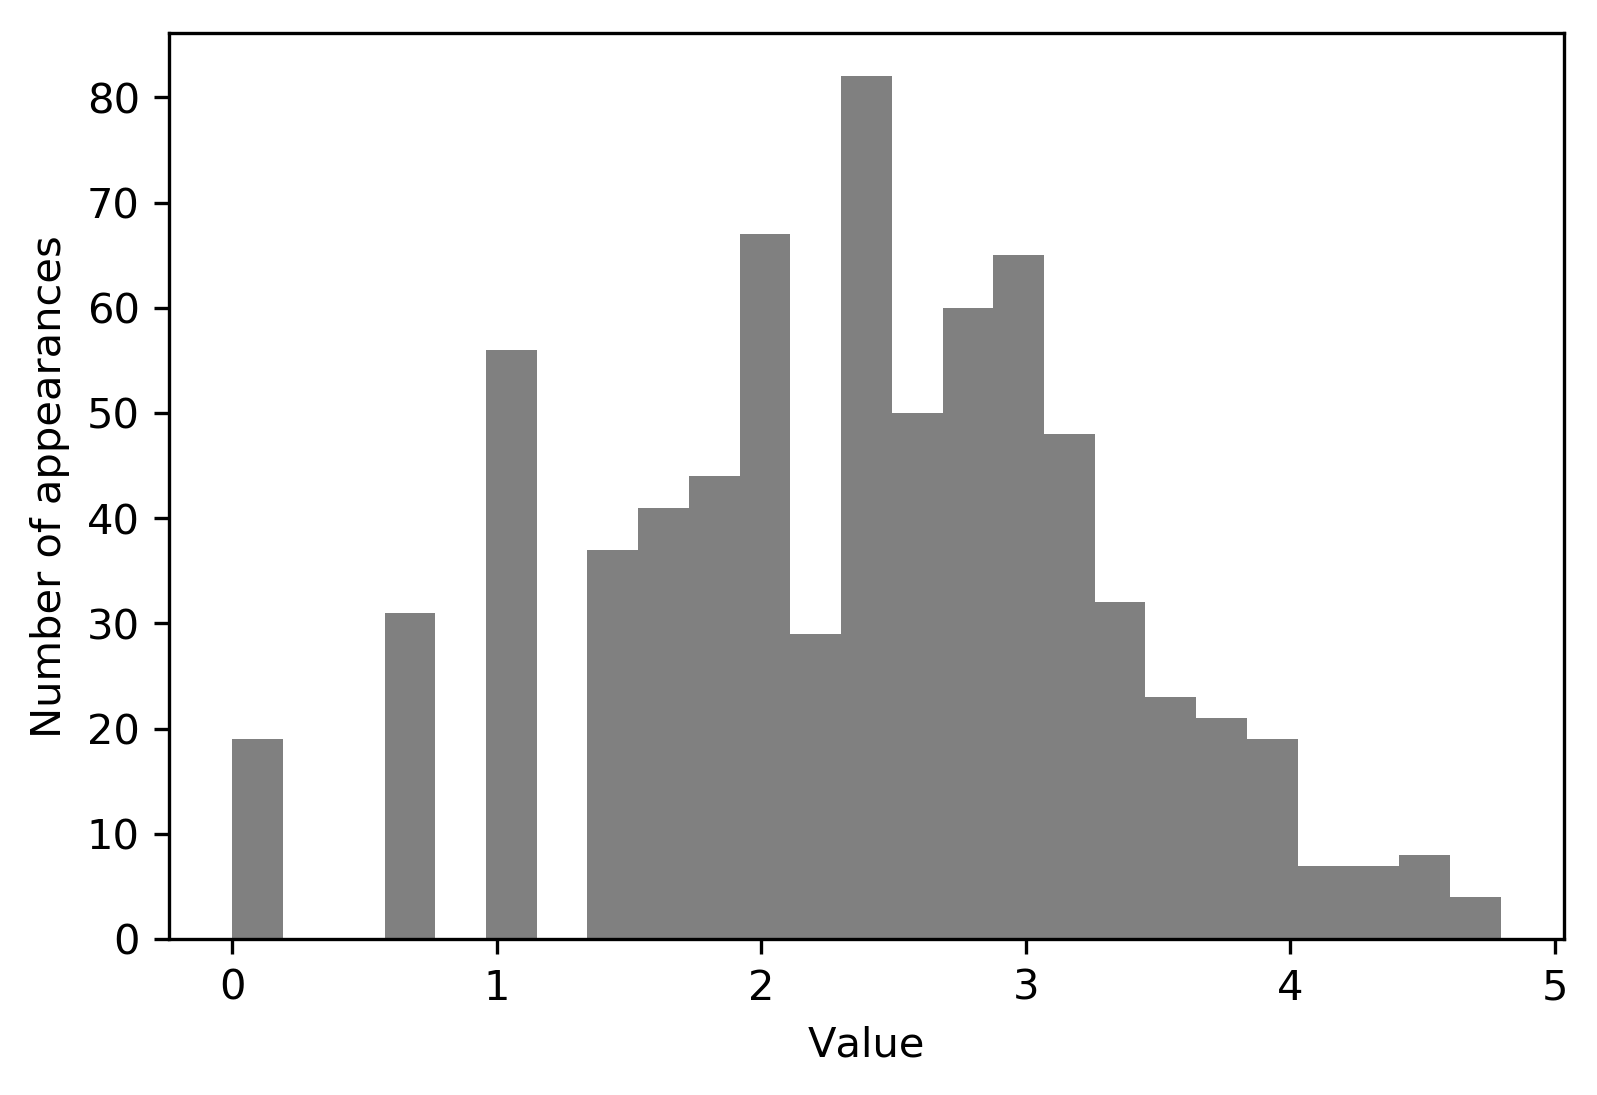

In [40]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

- 정규분포에 가까운 데이터를 사용하여 Ridge 모델 적용
  - 성능개선!!!

In [41]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


- 원 데이터 집합에 대하여 구간 분할, 다항식 변환, 비선형 변환 등이 모델 성능에 영향을 주는 정도
  - 선형 모델, 나이브 베이즈 모델: 영향 큼
  - SVM, 최근접 이웃, 신경망: 영향 중간
  - 트리 기반 모델: 영향 거의 없음

### 4.5 Automatic Feature Selection
- 특성 차원이 높은 데이터 셋에 대해 유용한 특성만 선택하고 나머지는 무시하는 통계적 기법
  - Univariate Statistics (일변량 통계)
  - Model-based Selection (모델 기반 선택)
  - Iterative Selection (반복적 선택)
- 위 방법 모두 지도학습 방법
  - 최적의 특성을 찾기 위해서 타깃 정보이 필요
- 훈련 데이터와 테스트 데이터를 나눈 다음 훈련 데이터에 대해서만 위 기법 적용하여 특성 선택해야 함.

#### 4.5.1 Univariate statistics (일변량 통계)
- ANOVA (Analysis of Variance, 분산분석)
  - 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 분석하여 관련성이 깊은 특성만 선별
  - 각 특성이 독립적으로 평가됨
  - 계산 속도 빠름
  - 분석을 위한 모델 구성 필요 없음
  - 특성 선택 이후 적용하려는 모델에 상관없이 사용가능

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [43]:
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
print("Shape of noise: {}".format(noise.shape))

Shape of noise: (569, 50)


In [44]:
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
print("Shape of X_w_noise: {}".format(X_w_noise.shape))

Shape of X_w_noise: (569, 80)


- ANOVA를 내장한 scikit-learn 일변량 분석 모듈
  - feature_selection.SelectKBest
    - 가장 연관성이 높은 k개의 특성 선택 
  - feature_selection.SelectPercentile
    - 가장 연관성이 높은 특성을 지정된 비율 만큼 선택

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


- get_support()
  - 어떠한 특성이 선택되었는지를 확인해줌

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
[9, 11, 18, 19]


([], <a list of 0 Text yticklabel objects>)

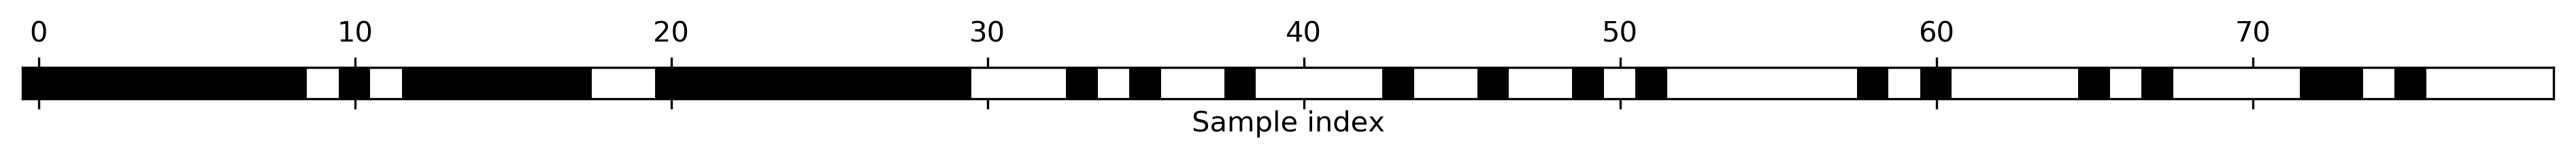

In [46]:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [47]:
mask.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False,  True, False,
        False,  True, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False]], dtype=bool)

- 전체 80개의 특성을 이용했을 때와 선택된 40개의 특성을 이용했을 때의 LogisticRegression 모델 성능 비교

In [48]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


#### 4.5.2 Model-based Feature Selection (모델 기반 특성 선택)
- 지도학습 모델을 사용하여 특성의 중요도를 평가하여 중요 특성 선별
- 특성 선택에 사용했던 지도학습 모델과 최종적으로 사용할 모델과 동일할 필요는 없음.
- 한번에 모든 특성을 고려하여 선별하므로 Univariate statistics (일변량 통계) 방식보다 더 성능이 좋음
- feature_selection.SelectFromModel(model, threshold)
  - 주어진 model을 활용하여 모델을 생성하고 threshold에 지정된 임계치보다 큰 모든 특성을 선택함
  - 아래 예제는 절반의 특성을 선별하도록 threshold="median"을 인자로 넣음

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

In [50]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]
[11, 14]


([], <a list of 0 Text yticklabel objects>)

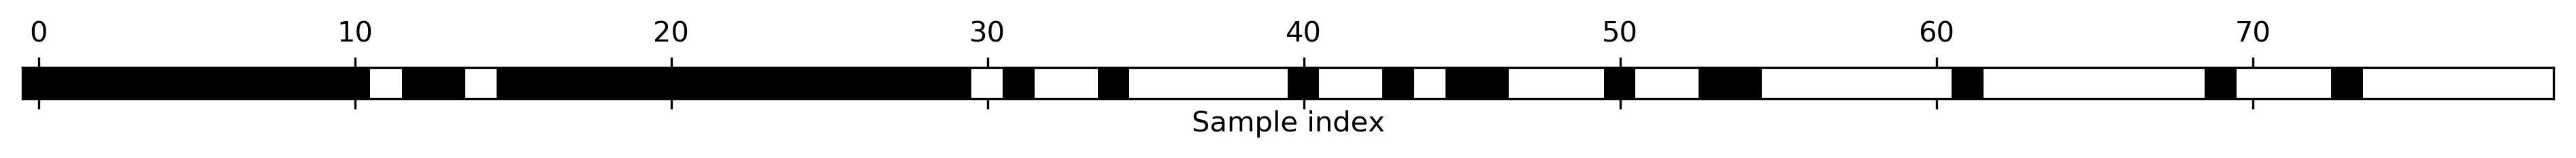

In [51]:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [52]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


#### 4.5.3 Iterative feature selection (반복적 특성 선택)
- 첫번째 방법
  - 특성을 선택하지 않은 상태에서 어떤 종료 조건에 도달할 때까지 새로운 특성을 하나씩 선택하는 방법
- 두번째 방법
  - 모든 특성을 선택한 상태에서 어떤 종료 조건에 도달할 때까지 특성을 하나씩 제거하는 방법
  - 재귀적 특성 제거(Recursive Feature Elimination, RFE)
    - feature_selection.RFE(model, n_features_to_select)
      - 1) 전체 특성을 활용하여 주어진 model을 만듦.
      - 2) 특성 중요도가 가장 낮은 특성부터 제거
      - 3) 제거한 특성을 제외하고 다시 1)로 이동하여 model을 새롭게 만듦
      - 특성의 개수가 n_features_to_select로 남을때 까지 위와 같은 과정 반복 

In [53]:
from sklearn.feature_selection import RFE
select = RFE(
    RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=40
)

select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_rfe.shape: {}".format(X_train_rfe.shape))

X_train.shape: (284, 80)
X_train_rfe.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]
[16]


([], <a list of 0 Text yticklabel objects>)

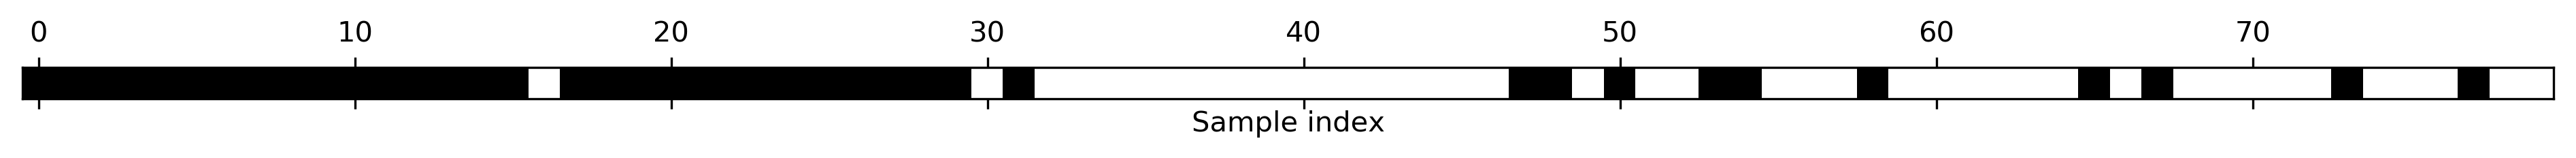

In [54]:
# visualize the selected features:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [55]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [56]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### 4.6 Utilizing Expert Knowledge
- 도메인 전문가는 초기 데이터에서 더 유용한 특성을 선별하는 데 많은 도움을 줄 수 있음

- 뉴욕시티 자전거 대여 데이터를 사용한 문제
  - https://www.citibikenyc.com/system-data
  - 문제
    - 데이터: 2015년 8월 한달 동안에 대하여 3시간 단위로 앤디 집 앞에 있는 자전거 대여 횟수
    - 특정 날짜와 시간에 앤디 집 앞에 있는 자전거를 사람들이 얼마나 대여하는지 예측
    - 앤디가 빌릴 수 있는 자전거가 남아 있는지 예측

In [73]:
citibike = mglearn.datasets.load_citibike()
print("citibike.data.shape:", citibike.shape)
print(type(citibike))

citibike.data.shape: (248,)
<class 'pandas.core.series.Series'>


In [74]:
print("Citibike data:\n{}".format(citibike.head()))

Citibike data:
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


- 8월 한달 동안의 대여 횟수

In [75]:
plt.figure(figsize=(10, 3))

xticks = pd.date_range(
    start=citibike.index.min(), 
    end=citibike.index.max(),
    freq='D'
)

print(xticks)

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')


Text(0,0.5,'Rentals')

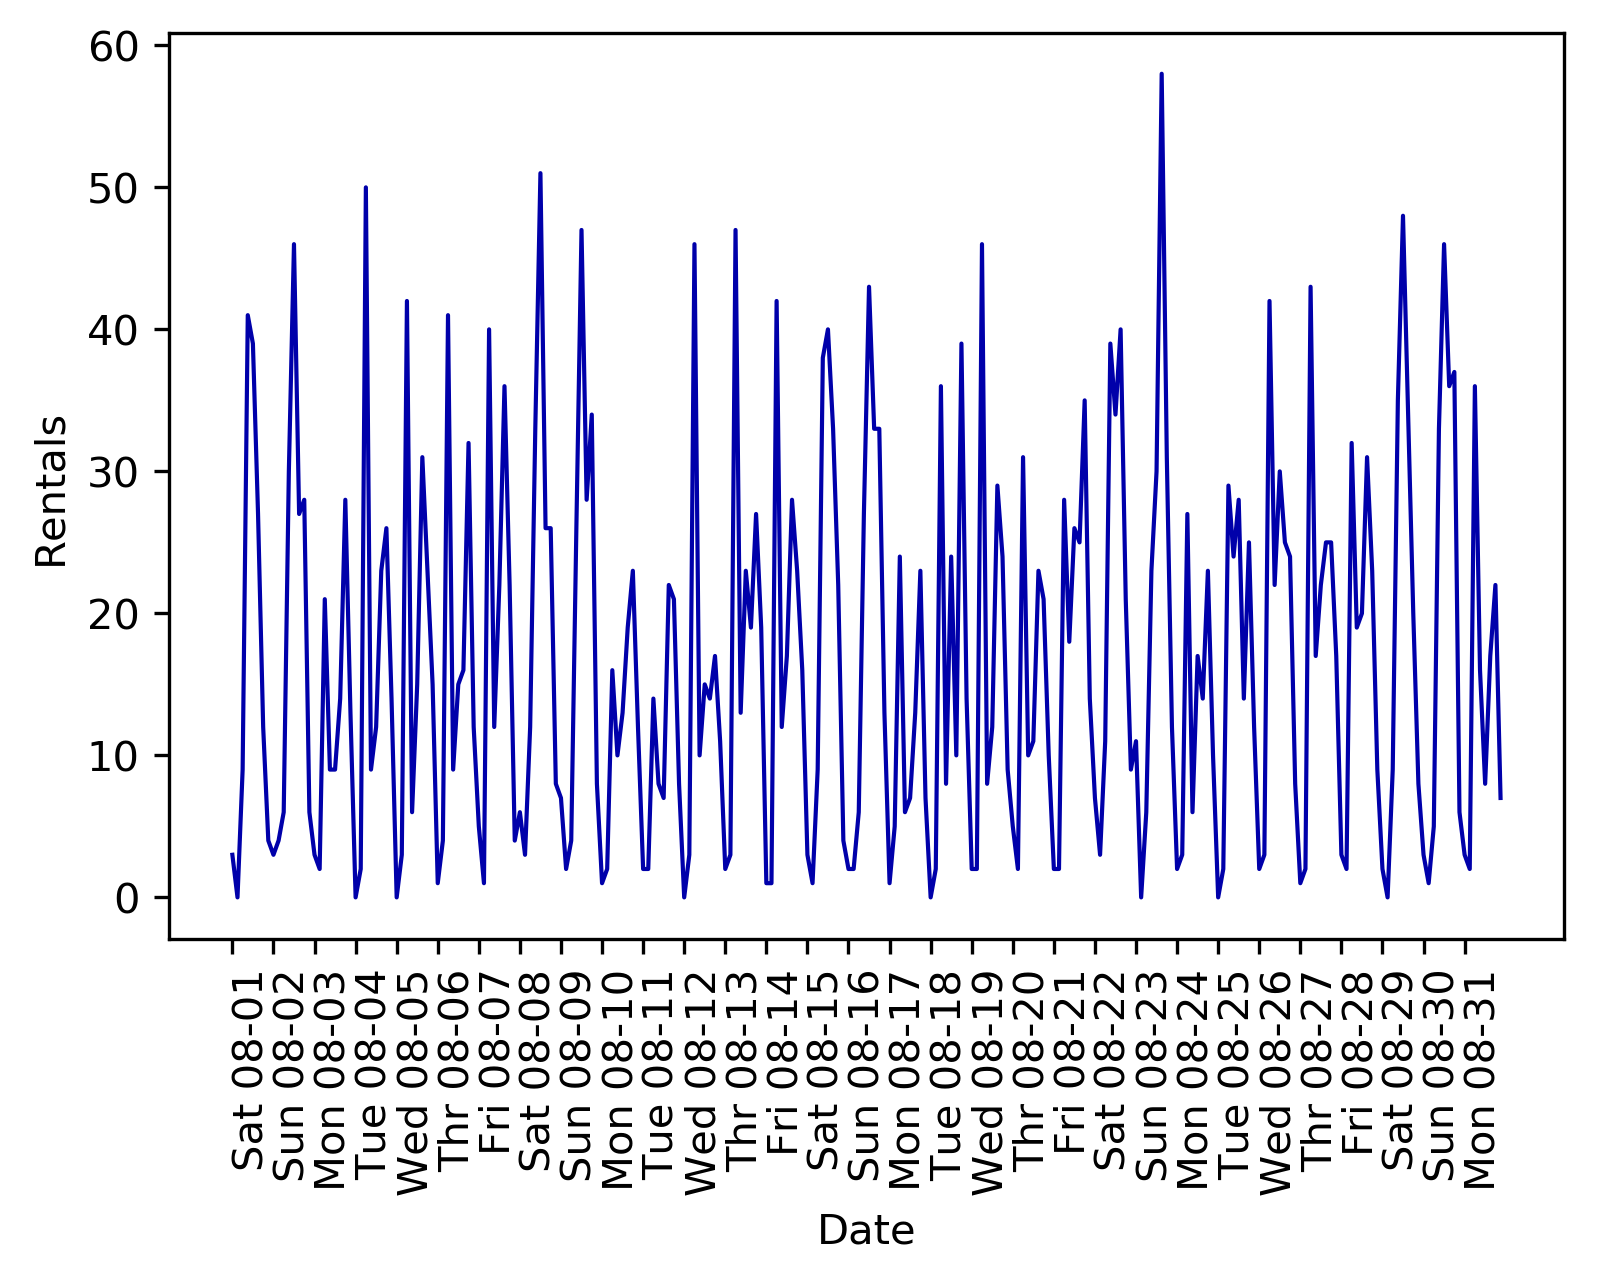

In [76]:
week = ["Sun", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat"]
xtick_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xtick_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

- 24시간 간격으로 낮과 밤에 따라 자전거 대여 횟수에 확연한 차이가 있음
- 주중과 주말의 패턴도 차이가 있음

- 시계열 데이터를 이용한 예측 작업
  - 과거 데이터에서 학습하여 미래를 예측하는 방식
- 데이터 크기
  - 훈련 데이터: 23일 치 - 23 * 8 = 184개
  - 테스트 데이터: 8일 치 - 8 * 8 = 64
  - Note: 24 / 3 = 8

In [77]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [81]:
print(X[0], y[0])
print(X[1], y[1])
print(X[2], y[2])
print()

print(X.shape)
print(y.shape)

[1438387200] 3.0
[1438398000] 0.0
[1438408800] 9.0

(248, 1)
(248,)


In [82]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    
    # also split the target array 
    y_train, y_test = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


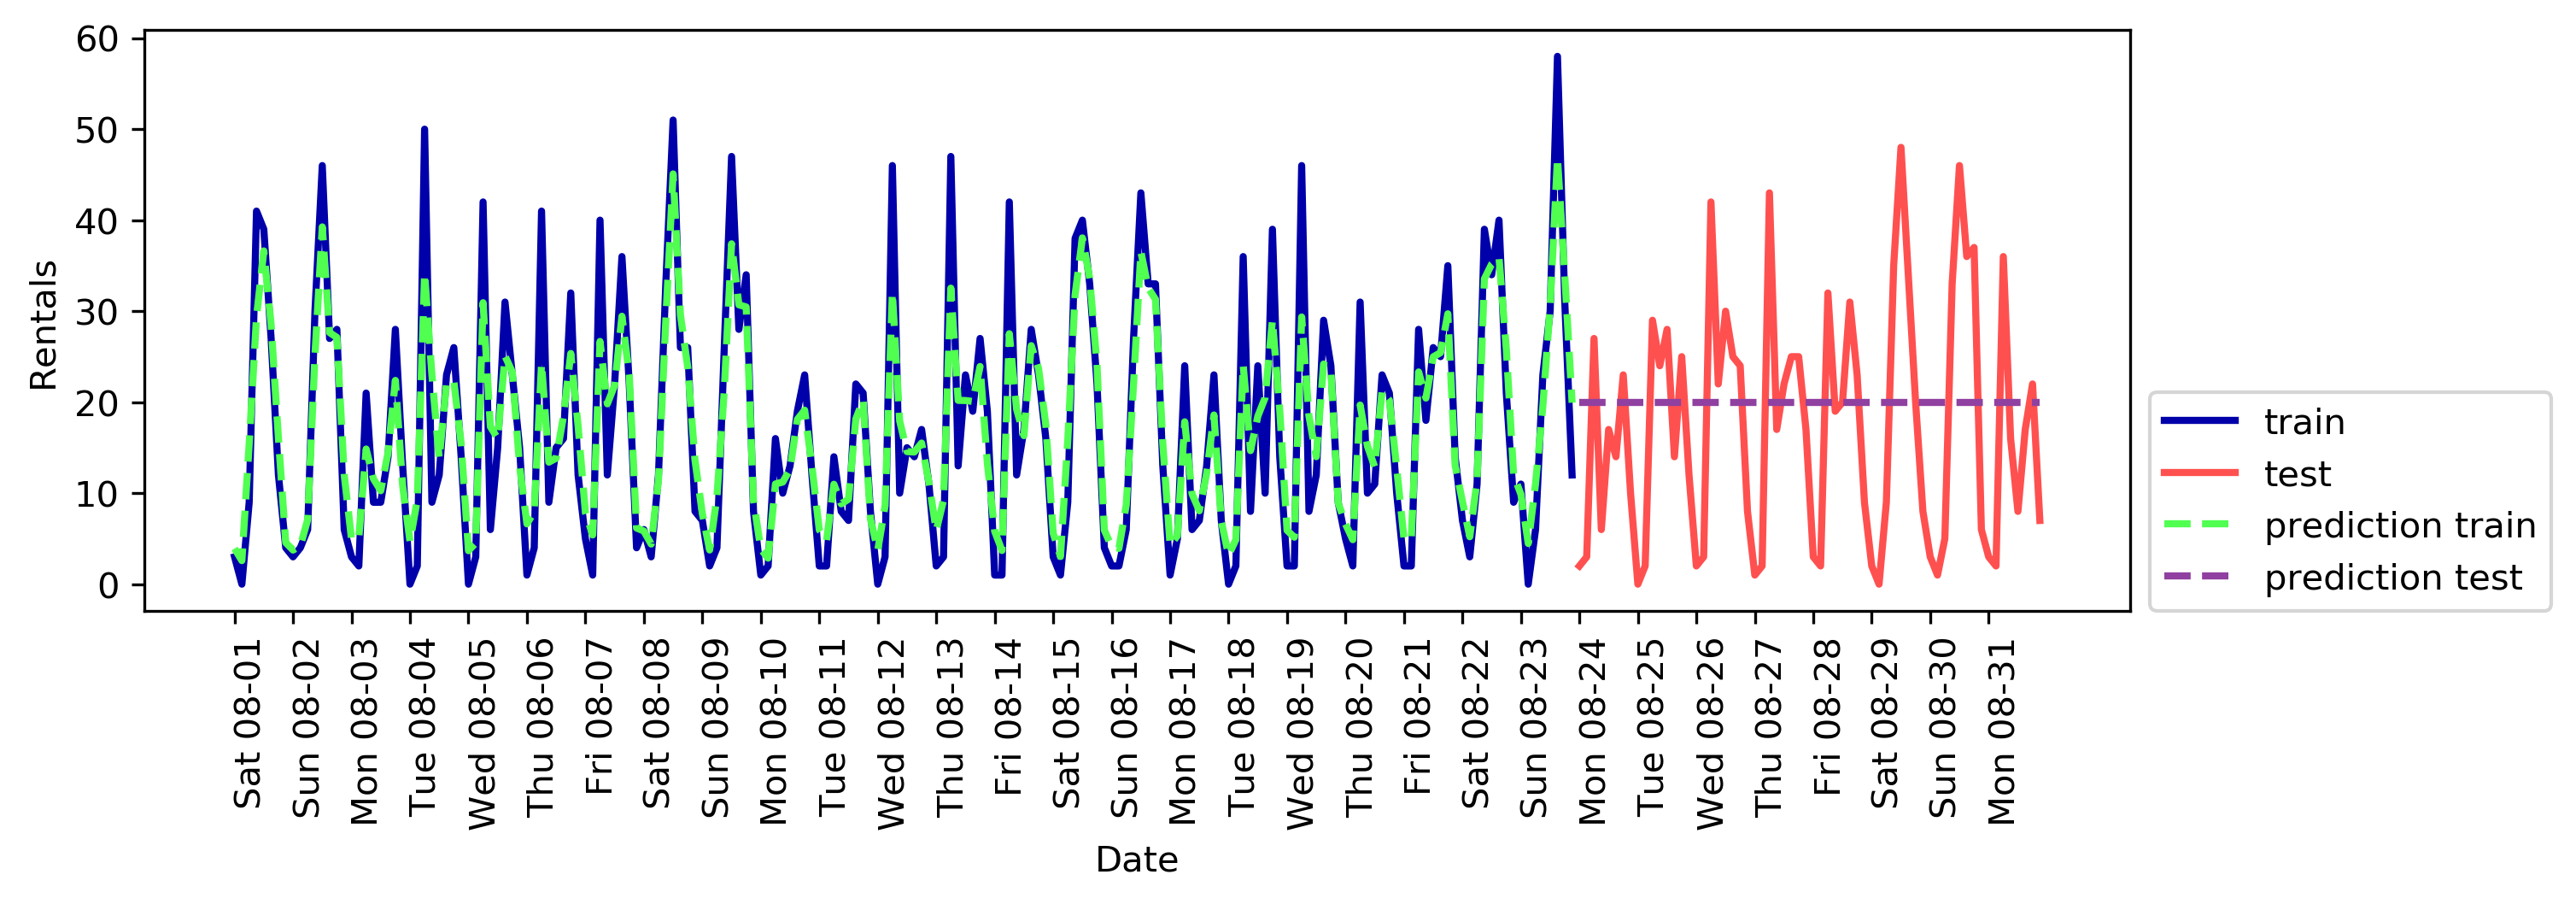

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

- 훈련 데이터에 대한 예측은 정확
- 테스트 데이터에 대한 예측은 실패
  - $R^2$=-0.04
  - 테스트 데이터들은 훈련 데이터보다 모두 뒤에 있음
  - RandomForestRegressor는 훈련 데이터 특성 범위 밖으로 Extrapolation할 수 없음

- 해결 방법 (전문가 지식)
  - 훈련 데이터 특성에서 날짜 정보 (시간의 흐름 정보) 제외
  - 우선 시각 정보만 활용 (3시간 단위)

[0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], [18], [21], [0], [3], [6], [9], [12], [15], 

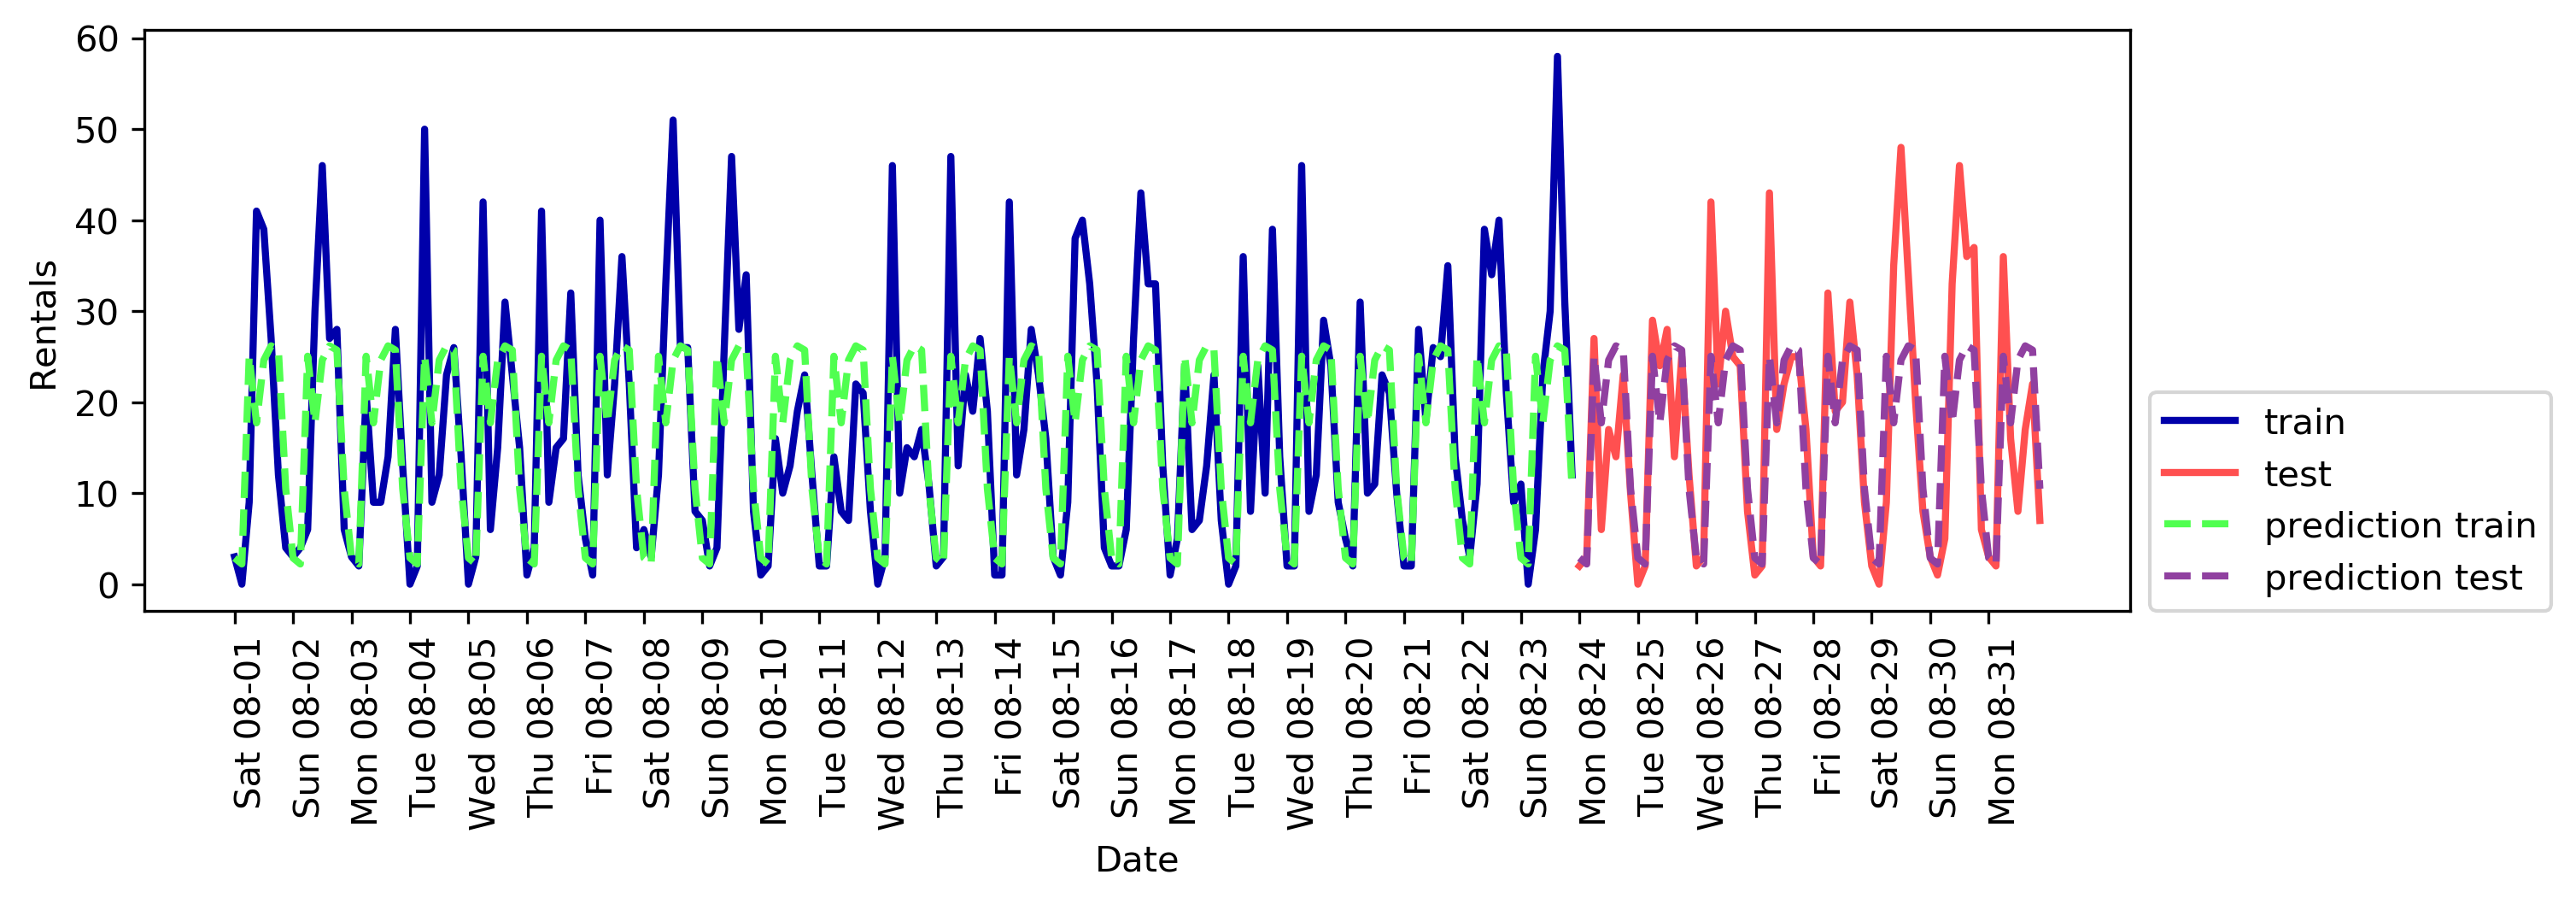

In [90]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
for i in range(len(X_hour)):
    print(X_hour[i], end=", ")
print()
print()
print(X_hour.shape)
print()
eval_on_features(X_hour, y, regressor)

- 위 결과에서 시각에 따른 패턴 예측은 비교적 정확
  - $R^2$=0.6
  - 하지만, 주간 및 주말에 따른 패턴은 예측하지 못하고 있음<br/><br/>
  
 
- 해결 방법
  - 요일 정보를 훈련 데이터에 추가

(248, 1)
(248, 1)

[5 0], [5 3], [5 6], [5 9], [ 5 12], [ 5 15], [ 5 18], [ 5 21], [6 0], [6 3], [6 6], [6 9], [ 6 12], [ 6 15], [ 6 18], [ 6 21], [0 0], [0 3], [0 6], [0 9], [ 0 12], [ 0 15], [ 0 18], [ 0 21], [1 0], [1 3], [1 6], [1 9], [ 1 12], [ 1 15], [ 1 18], [ 1 21], [2 0], [2 3], [2 6], [2 9], [ 2 12], [ 2 15], [ 2 18], [ 2 21], [3 0], [3 3], [3 6], [3 9], [ 3 12], [ 3 15], [ 3 18], [ 3 21], [4 0], [4 3], [4 6], [4 9], [ 4 12], [ 4 15], [ 4 18], [ 4 21], [5 0], [5 3], [5 6], [5 9], [ 5 12], [ 5 15], [ 5 18], [ 5 21], [6 0], [6 3], [6 6], [6 9], [ 6 12], [ 6 15], [ 6 18], [ 6 21], [0 0], [0 3], [0 6], [0 9], [ 0 12], [ 0 15], [ 0 18], [ 0 21], [1 0], [1 3], [1 6], [1 9], [ 1 12], [ 1 15], [ 1 18], [ 1 21], [2 0], [2 3], [2 6], [2 9], [ 2 12], [ 2 15], [ 2 18], [ 2 21], [3 0], [3 3], [3 6], [3 9], [ 3 12], [ 3 15], [ 3 18], [ 3 21], [4 0], [4 3], [4 6], [4 9], [ 4 12], [ 4 15], [ 4 18], [ 4 21], [5 0], [5 3], [5 6], [5 9], [ 5 12], [ 5 15], [ 5 18], [ 5 21], [6 0], [6 3], [6 6], 

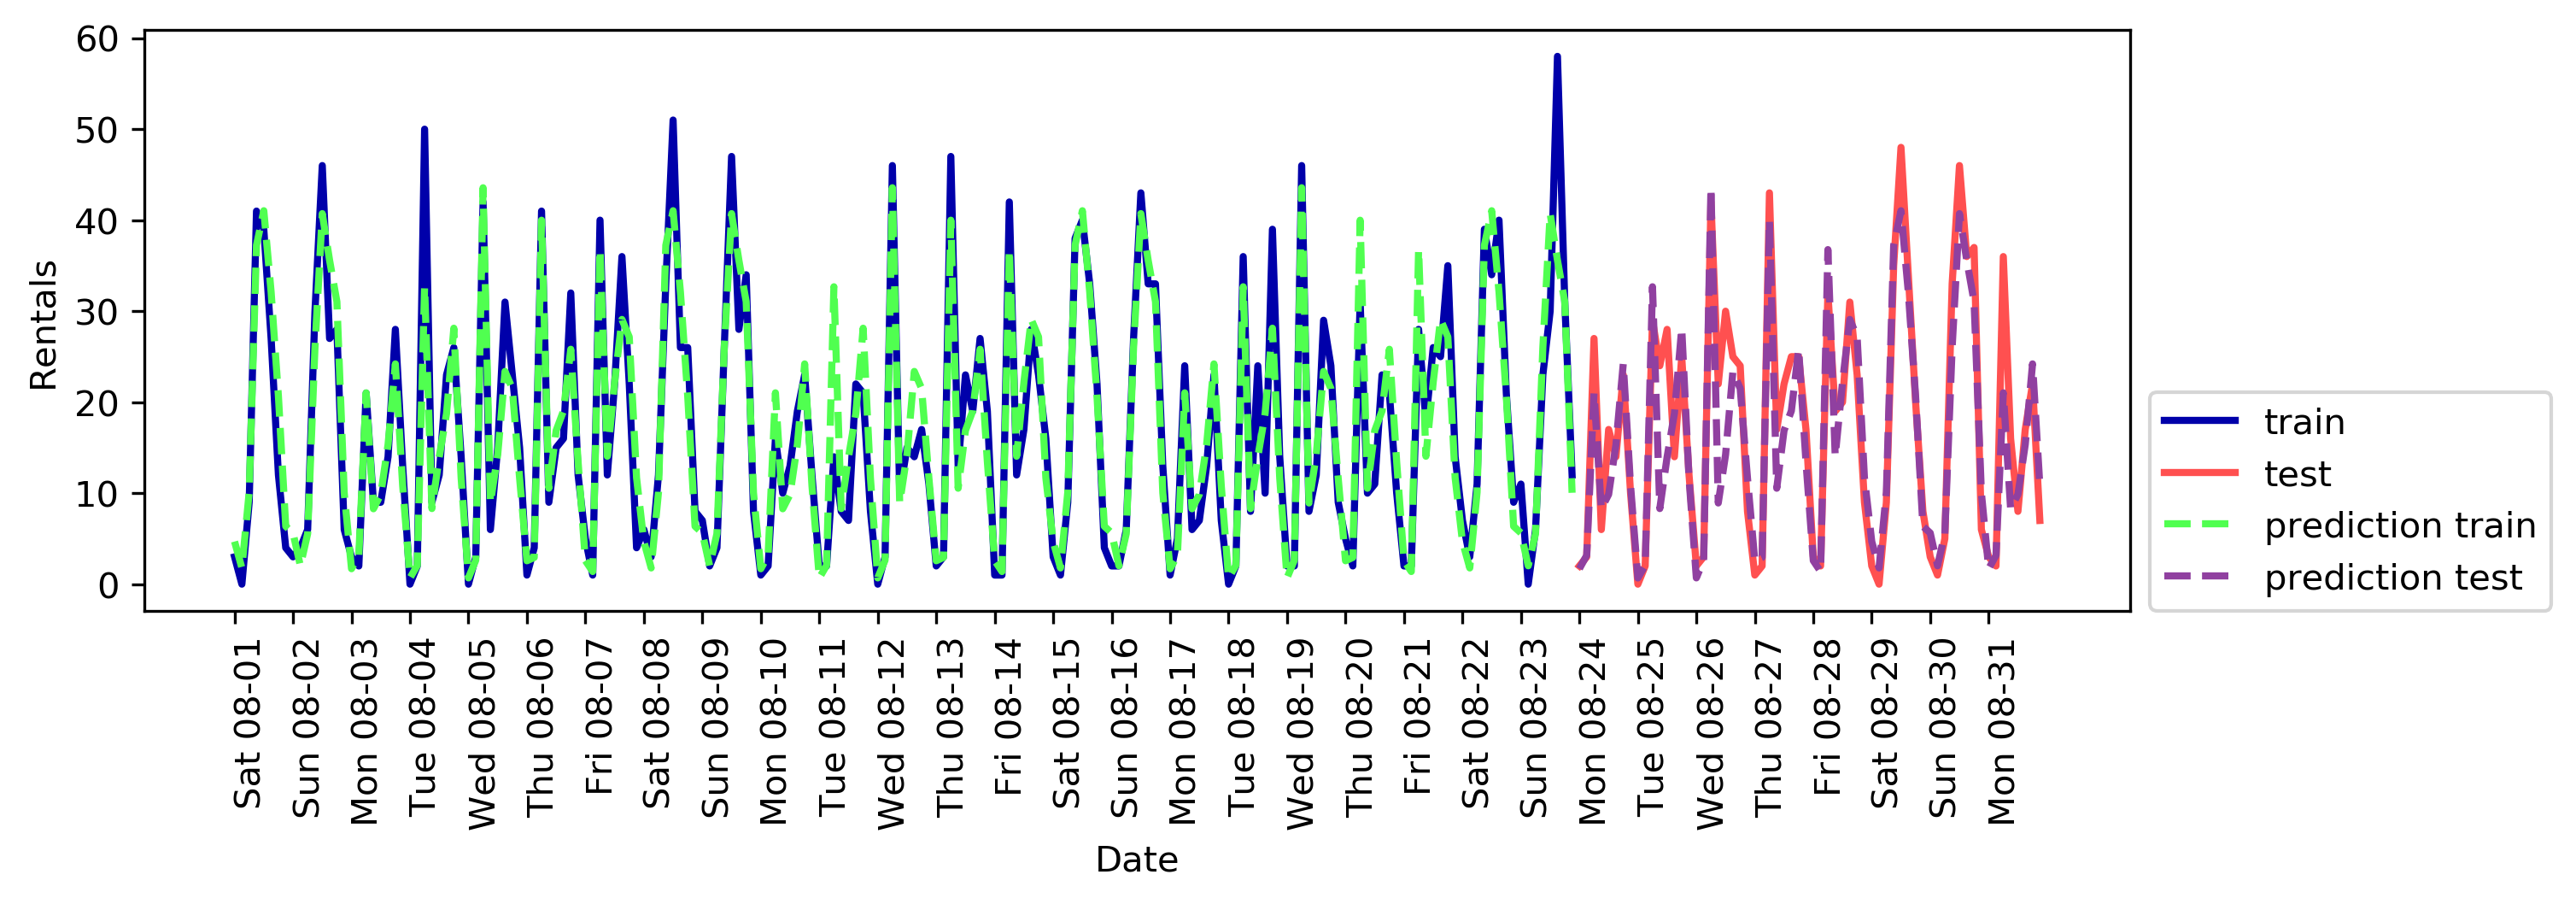

In [93]:
a = citibike.index.dayofweek.values.reshape(-1, 1)
b = citibike.index.hour.values.reshape(-1, 1)
print(a.shape)
print(b.shape)
print()

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])

for i in range(len(X_hour_week)):
    print(X_hour_week[i], end=", ")
print()
print()
print(X_hour_week.shape)
print()

eval_on_features(X_hour_week, y, regressor)

- 예측의 결과가 비교적 정확
  - $R^2$=0.84

- RandomForestRegressor가 아닌 선형 모델 사용

Test-set R^2: 0.13


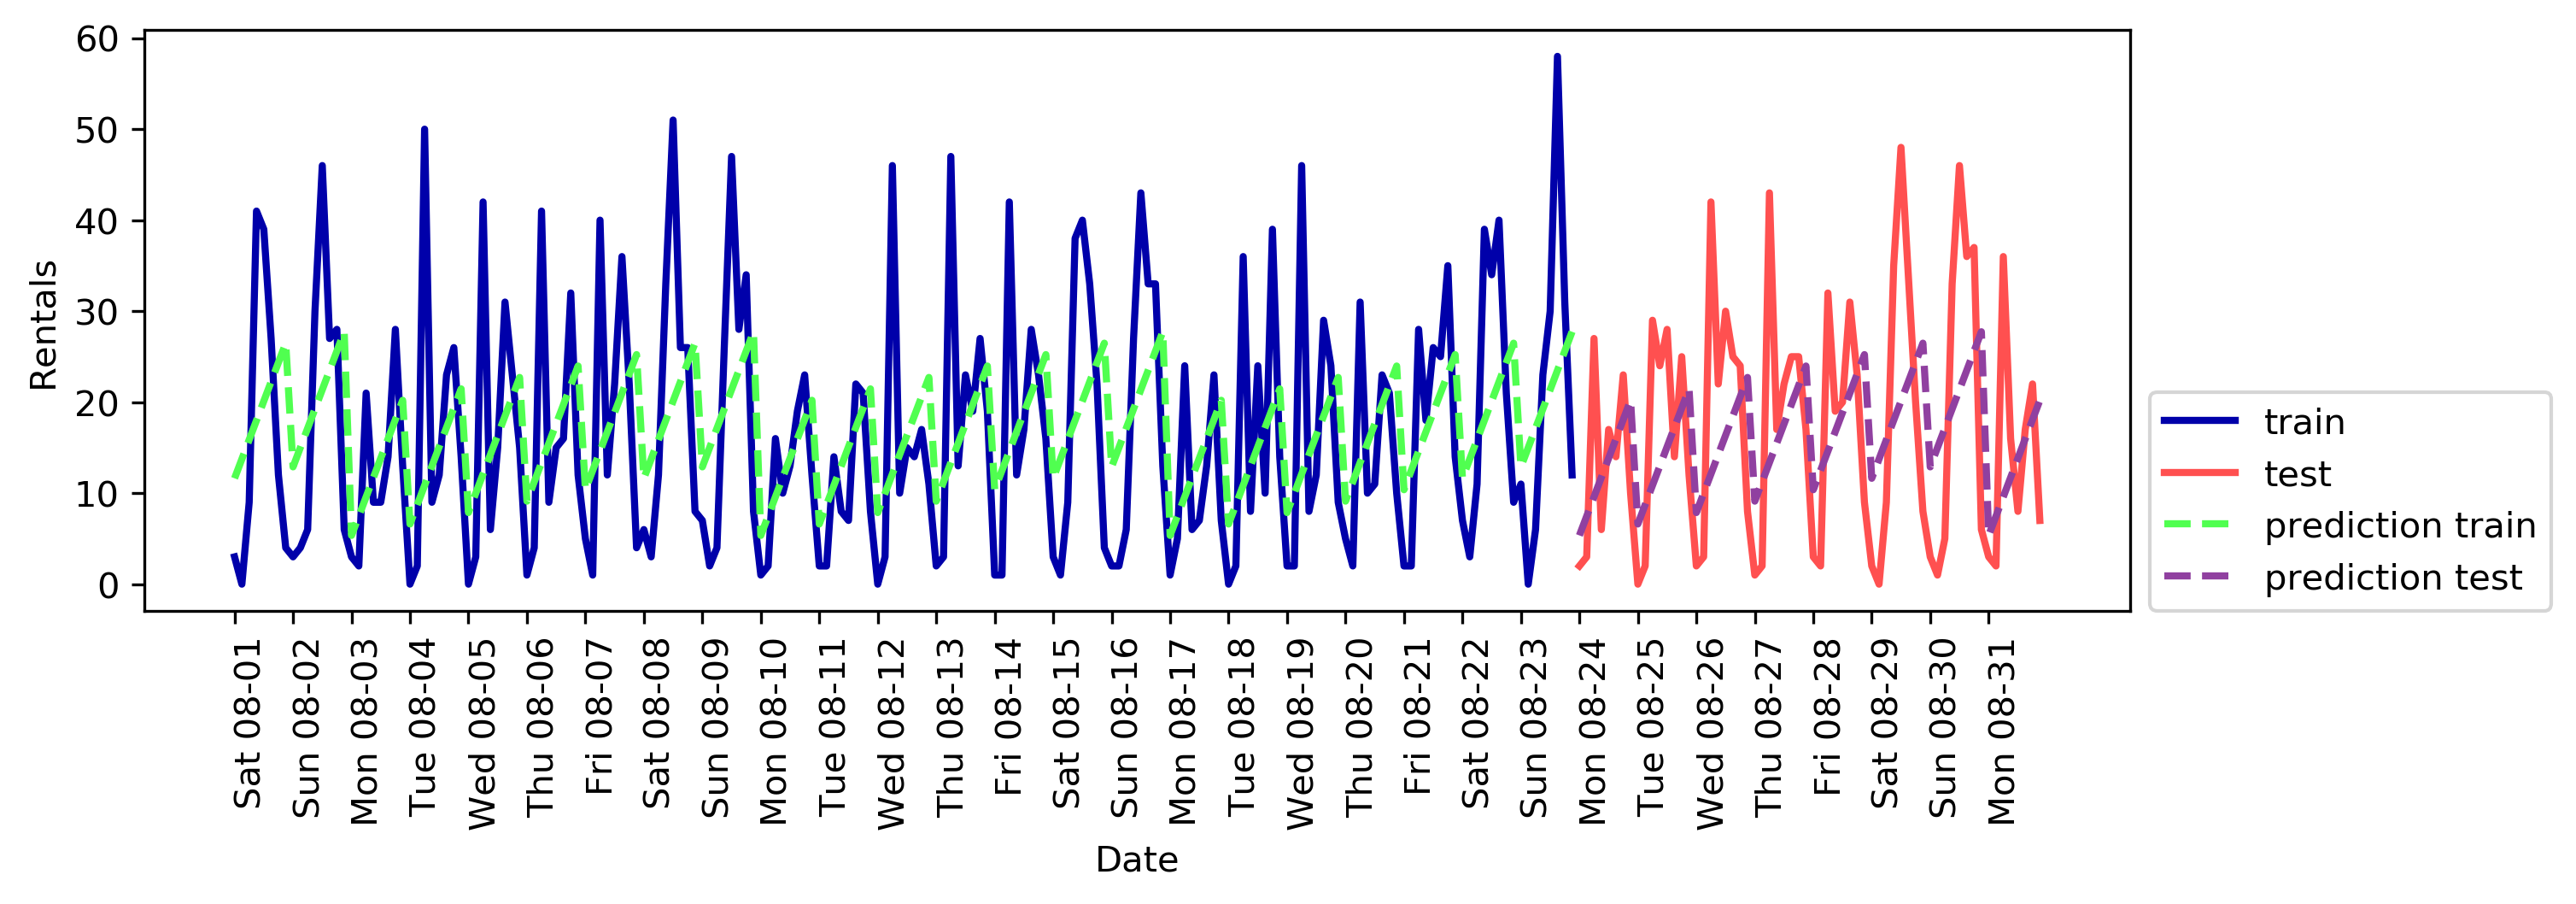

In [95]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

- LinearRegression 모델의 학습 결과가 좋지 않음
  - 요일과 시간이 정수로 인코딩되어 있어서 자동으로 연속형 변수로 해석됨
  - 시간을 선형 함수로만 학습하기 때문에 하루에서 시간이 흐를수록 결과값이 증가됨
  - 훈련 데이터 특성을 이산형으로 변형
     - OneHotEncorder 사용

In [99]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

print(X_hour_week_onehot[0])
print(X_hour_week_onehot[1])
print(X_hour_week_onehot[2])
print()
print(X_hour_week_onehot.shape)
print()

[ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]

(248, 15)



Test-set R^2: 0.62


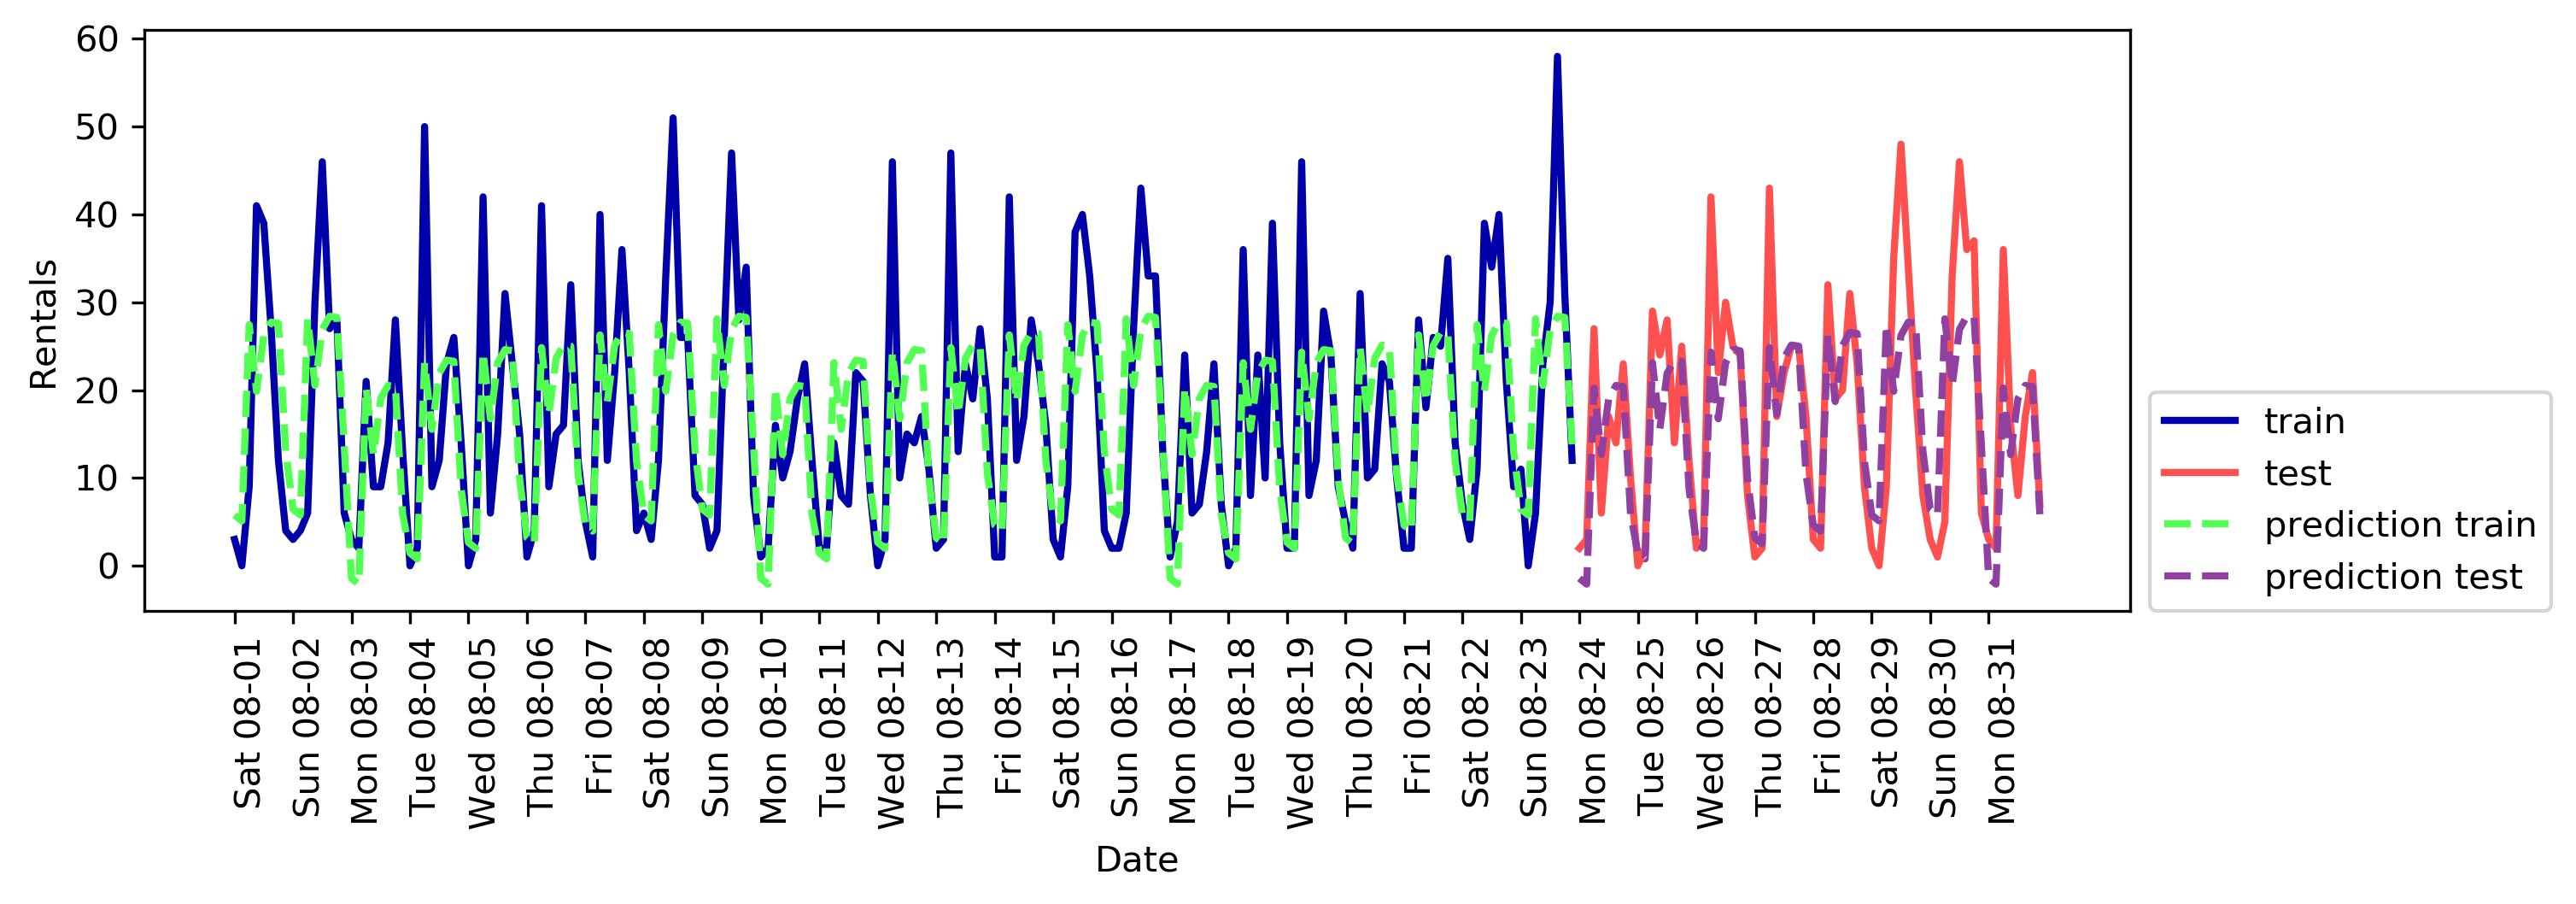

In [98]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


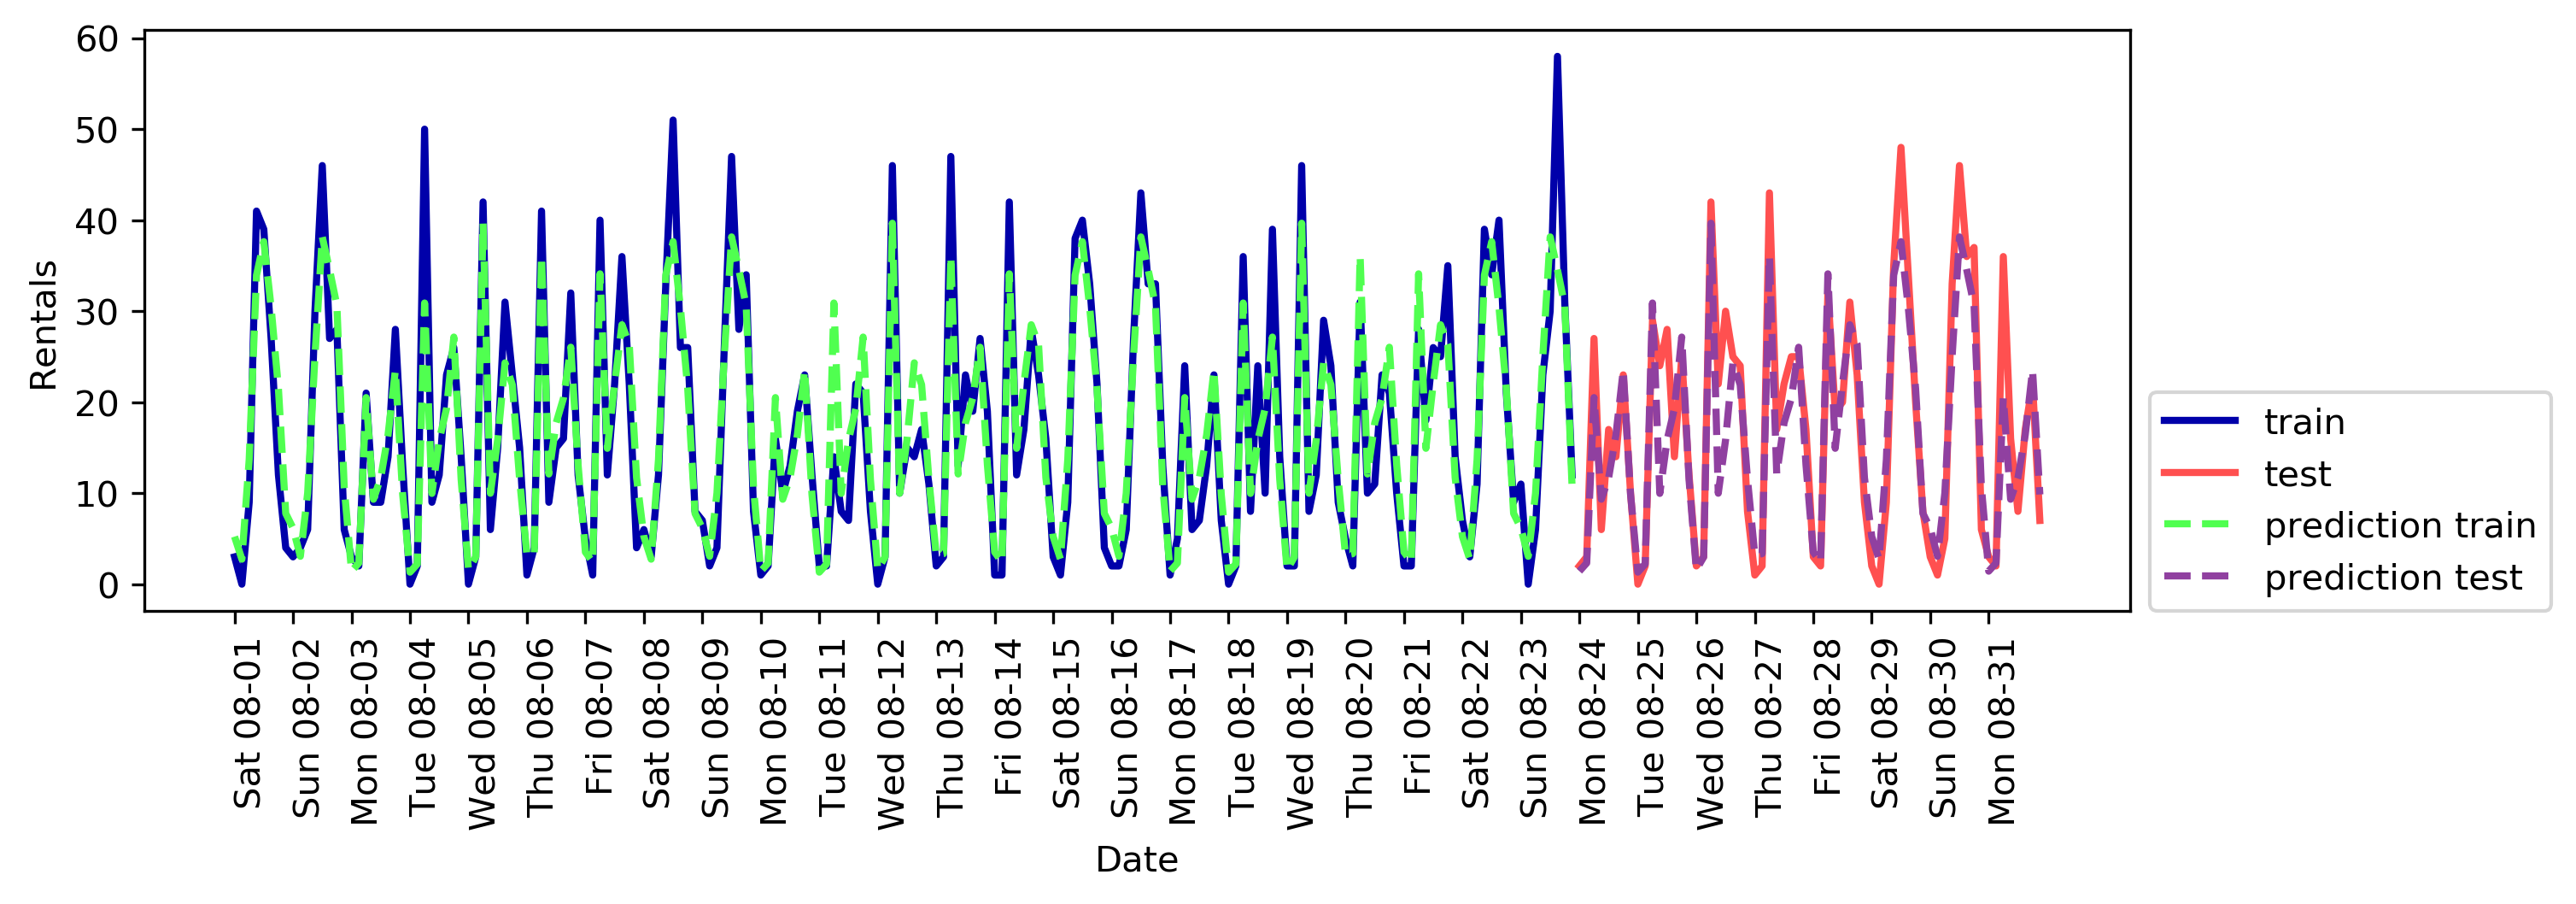

In [69]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [100]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [101]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'Feature magnitude')

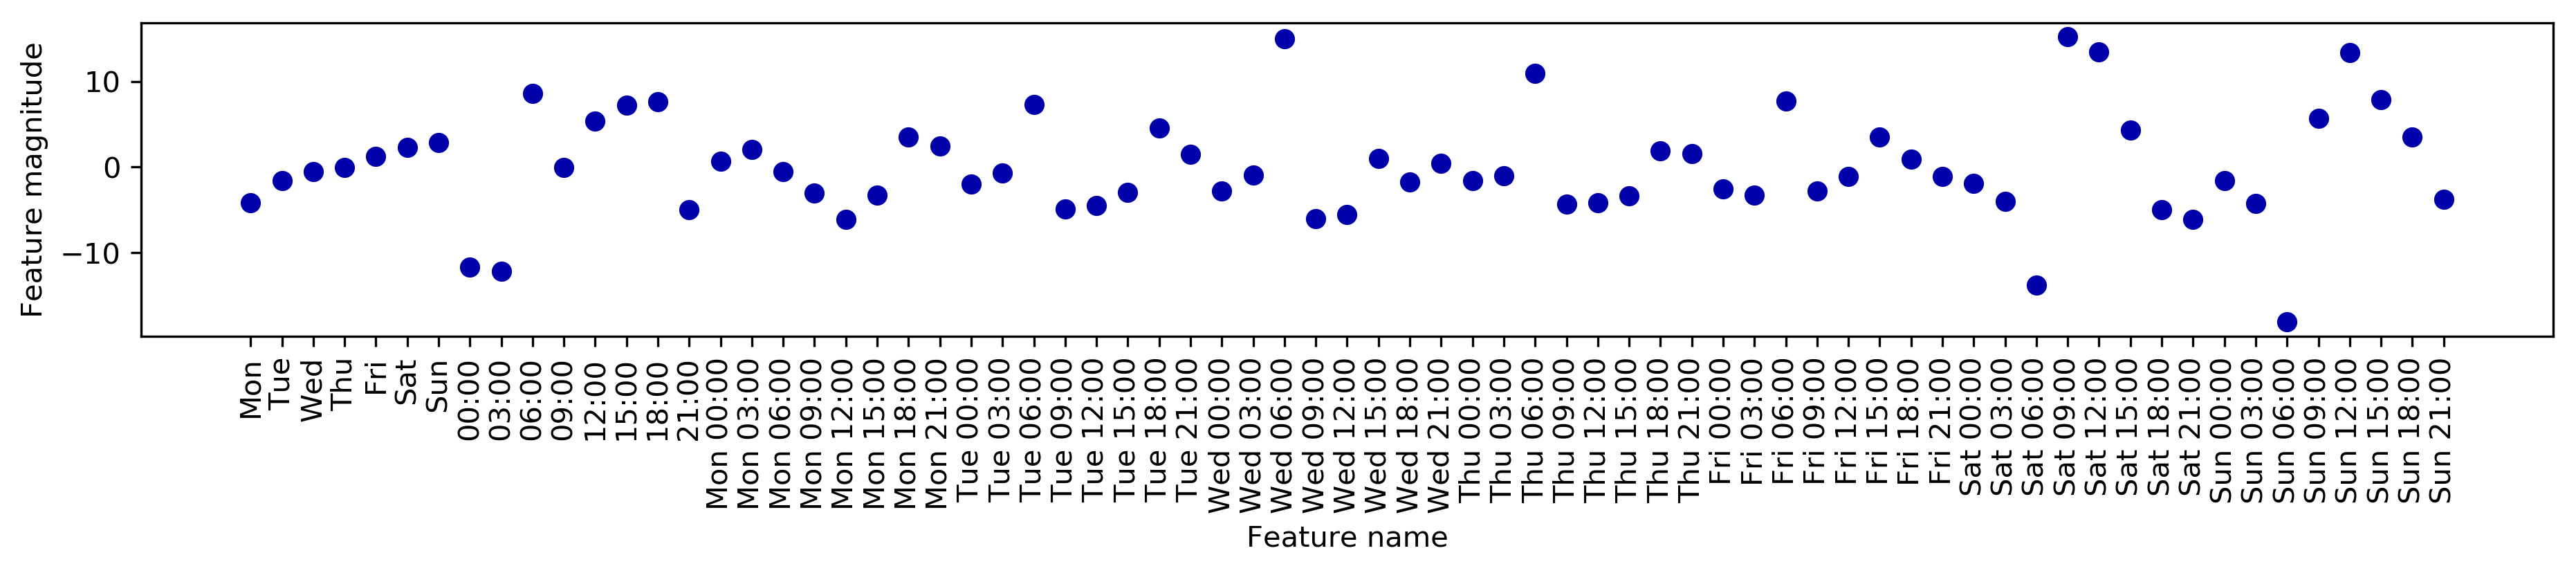

In [102]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

### Summary and outlook